#### Abstract : Predict the doctor fees


# Import Libraries and dataset

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

# importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the dataset
doctor = pd.read_excel("Final_Train.xlsx")

In [3]:
#view the first five records
doctor.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


### Observation:
- There are 7 columns and all the independent variables of type object
- The columns are mixed with different forms of data 

In [4]:
#checking the shape of data
doctor.shape

(5961, 7)

### There are 5961 records and 7 columns
- After proper EDA and Data Cleaning the number of records and columns will change.

In [5]:
# Checking the general information 
doctor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


### Observation

- There are null values in rating column
- There are null values in Miscellaneous_info

#### Fees - The Fees column is the target but the values seems to be discrete.
- All the independent variables are categorical, therefore supervised/classification model will be selected.

# Exploratory Data Analysis and Data Cleaning

In [6]:
#check for null values
doctor.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

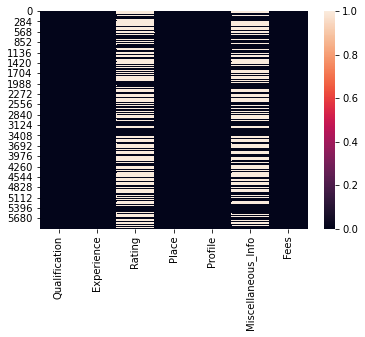

In [7]:
# heatmap to inspect null values
sns.heatmap(doctor.isnull())

###### The percentage of data missing in Rating is 55.4% - cannot drop rows - simple imputer
###### The percentage of data missing in place is  4.2%  - can drop rows  - dropna
###### the percent of data missing in miscellaneous_info is 44% - cannot drop row - simple imputer

##### split each column to get clear understanding

In [8]:
# simple imputer to remove null values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = "most_frequent")
doctor["Rating"] =imp.fit_transform(doctor["Rating"].values.reshape(-1,1))
doctor["Miscellaneous_Info"] =imp.fit_transform(doctor["Miscellaneous_Info"].values.reshape(-1,1))

In [9]:
doctor.dropna(inplace = True)

In [10]:
doctor.shape

(5936, 7)

In [11]:
doctor.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

- Null values removed

##### Inspecting Each column seperately

## Quaification

In [12]:
qualification =doctor[["Qualification"]].copy()

In [13]:
qualification

,Qualification
0,"BHMS, MD - Homeopathy"
1,"BAMS, MD - Ayurveda Medicine"
2,"MBBS, MS - Otorhinolaryngology"
3,"BSc - Zoology, BAMS"
4,BAMS
...,...
5956,"MBBS, MS - ENT"
5957,MBBS
5958,MBBS
5959,"MBBS, MD - General Medicine"


In [14]:
 qualification["Qualification"] = qualification["Qualification"].str.replace(",", " ").str.replace("-", "")

remove = ["'","/","(",")","&",".","smile","Year","In","in","And","AND","and",'VD','FAMS','Fellowship','of','the','Doctor','Science','Academy','Royal','College','Post', 'Graduate', 'Diploma','Crown','Bridge']

for r in remove:
    qualification["Qualification"] = qualification["Qualification"].str.replace(r, "")

In [15]:
qualification

,Qualification
0,BHMS MD Homeopathy
1,BAMS MD Ayurveda Medice
2,MBBS MS Otorholaryngology
3,BSc Zoology BAMS
4,BAMS
...,...
5956,MBBS MS ENT
5957,MBBS
5958,MBBS
5959,MBBS MD General Medice


In [16]:
#spliting the column
quali = qualification.Qualification.str.split().tolist()

In [17]:
quali

[['BHMS', 'MD', 'Homeopathy'],
 ['BAMS', 'MD', 'Ayurveda', 'Medice'],
 ['MBBS', 'MS', 'Otorholaryngology'],
 ['BSc', 'Zoology', 'BAMS'],
 ['BAMS'],
 ['BAMS'],
 ['BHMS'],
 ['BDS'],
 ['MBBS', 'MD', 'General', 'Medice'],
 ['BSc', 'BDS'],
 ['MBBS', 'MS', 'DNB', 'ENT'],
 ['BAMS'],
 ['BDS', 'MDS'],
 ['BDS', 'MDS', 'Oral', 'Maxillacial', 'Surgery'],
 ['MBBS', 'Otorholaryngology', 'DLO', 'DNB', 'ENT'],
 ['MBBS', 'MD', 'General', 'Medice'],
 ['MBBS', 'Otorholaryngology', 'DLO'],
 ['MBBS', 'MF', 'Homeopathy'],
 ['MBBS', 'MS', 'ENT'],
 ['MBBS'],
 ['MDS', 'DNB', 'BDS'],
 ['MBBS', 'DNB', 'ENT'],
 ['MBBS'],
 ['MBBS', 'General', 'Practice', 'FCGP'],
 ['MBBS', 'DDVL'],
 ['BDS'],
 ['MBBS', 'IBCLC', 'USA'],
 ['MBBS', 'MD', 'General', 'Medice', 'Diabetology', 'PGDD'],
 ['BDS', 'MDS'],
 ['Dermatology', 'MBBS'],
 ['MBBS', 'DDVL', 'Aestic', 'Medice'],
 ['BDS'],
 ['MBBS', 'MS', 'ENT'],
 ['DM', 'Neurology', 'MD', 'Pediatrics', 'MBBS'],
 ['BAMS'],
 ['BDS',
  'MDS',
  'Oral',
  'Maxillacial',
  'Surgery',
  'Cl

In [18]:
#create the dataframe with column
df_quali = pd.DataFrame(quali)

In [19]:
df_quali

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,BHMS,MD,Homeopathy,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,BAMS,MD,Ayurveda,Medice,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,MBBS,MS,Otorholaryngology,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,BSc,Zoology,BAMS,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,BAMS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5931,MBBS,MS,ENT,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5932,MBBS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5933,MBBS,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5934,MBBS,MD,General,Medice,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [20]:
df_quali = df_quali[[0,1,2]].copy()

In [21]:
#Selecting the first three columns
df_quali

,0,1,2
0,BHMS,MD,Homeopathy
1,BAMS,MD,Ayurveda
2,MBBS,MS,Otorholaryngology
3,BSc,Zoology,BAMS
4,BAMS,None,None
...,...,...,...
5931,MBBS,MS,ENT
5932,MBBS,None,None
5933,MBBS,None,None
5934,MBBS,MD,General


In [22]:
#rename first three columns

df_quali.rename(columns ={0 : "UG", 1:"PG", 2:"Specialization"}, inplace=True)

In [23]:
df_quali

,UG,PG,Specialization
0,BHMS,MD,Homeopathy
1,BAMS,MD,Ayurveda
2,MBBS,MS,Otorholaryngology
3,BSc,Zoology,BAMS
4,BAMS,None,None
...,...,...,...
5931,MBBS,MS,ENT
5932,MBBS,None,None
5933,MBBS,None,None
5934,MBBS,MD,General


In [24]:
df_quali.isnull().sum()

UG                   0
PG                1794
Specialization    2290
dtype: int64

In [25]:
df_quali.shape

(5936, 3)

In [26]:
print(df_quali["UG"].unique())


['BHMS' 'BAMS' 'MBBS' 'BSc' 'BDS' 'MDS' 'Dermatology' 'DM' 'MD' 'MDSOral'
 'PhD' 'MRCPS' 'MS' 'DDVL' 'DHMS' 'GCEH' 'Healthcare' 'DNB'
 'Certification' 'Laryngology' 'FAGE' 'Aestic' 'BSAM' 'Family' 'FNB'
 'Dermotology' 'Certificate' 'Certified' '39' 'LCEH' 'Homeopathic' 'Child'
 'Otorholaryngology' 'te' 'MSc' 'al' 'Advanced' 'Medical' 'FCPS' 'GAMS'
 'BUMS' 'Diet' 'MBA' 'Trag' 'PG' 'POST' 'Oral' 'Diabetology' 'MCh' 'DDV'
 'Head' 'BEMS' 'MRCS' 'Periodontics' 'MA' 'MPH' 'MRCPCH' 'FRCS' 'BAc'
 'BIMS' 'Trichology' 'D' 'Ayurvedic' 'DHM' 'Member' 'Sk' 'Diabetic'
 'MRCGP' 'Naturopathy' 'MRCP' 'CGO' 'PGD' 'DNHE' 'ate' 'FRGUHS' 'M' 'FRCP'
 'Clical' 'Cochlear' 'Masters' 'PDCC' 'FFDRCSI' 'MDDVL' 'DGO']


In [27]:
df_quali["UG"].value_counts()


MBBS        2447
BDS         1208
BAMS         711
BHMS         706
MD           329
            ... 
Diabetic       1
FFDRCSI        1
PG             1
DHM            1
Masters        1
Name: UG, Length: 84, dtype: int64

In [28]:
ug = ['BHMS', 'BAMS', 'MBBS', 'BSc', 'BDS', 'MDS', 'Dermatology', 'DM', 'MD', 'MDSOral'
 ,'PhD', 'MRCPS', 'MS', 'DDVL', 'DHMS', 'GCEH', 'Healthcare', 'DNB',
 'Certification' ,'Laryngology', 'FAGE', 'Aestic', 'BSAM', 'Family', 'FNB'
, 'Dermotology' ,'Certificate' ,'Certified','LCEH', 'Homeopathic', 'Child'
, 'Otorholaryngology',  'MSc' ,  'Medical' ,'FCPS', 'GAMS',
 'BUMS' ,'Diet', 'MBA',  'PG', 'POST', 'Oral', 'Diabetology', 'MCh', 'DDV',
  'BEMS', 'MRCS', 'Periodontics', 'MA', 'MPH', 'MRCPCH', 'FRCS', 'BAc',
 'BIMS', 'Trichology',  'Ayurvedic', 'DHM',  'Diabetic',
 'MRCGP' ,'Naturopathy', 'MRCP', 'CGO', 'PGD', 'DNHE', 'FRGUHS' , 'FRCP',
 'Clical', 'Cochlear' ,'Masters' ,'PDCC' ,'FFDRCSI', 'MDDVL' ,'DGO']

In [29]:
df = df_quali.loc[df_quali["UG"].isin(ug)]

In [30]:
df

,UG,PG,Specialization
0,BHMS,MD,Homeopathy
1,BAMS,MD,Ayurveda
2,MBBS,MS,Otorholaryngology
3,BSc,Zoology,BAMS
4,BAMS,None,None
...,...,...,...
5931,MBBS,MS,ENT
5932,MBBS,None,None
5933,MBBS,None,None
5934,MBBS,MD,General


In [31]:
df["UG"].value_counts()

MBBS           2447
BDS            1208
BAMS            711
BHMS            706
MD              329
               ... 
Diabetic          1
FFDRCSI           1
PG                1
DHM               1
Dermotology       1
Name: UG, Length: 73, dtype: int64

In [32]:
df.shape

(5919, 3)

In [33]:
Qualification = df[["UG"]].copy()

In [34]:
Qualification 

,UG
0,BHMS
1,BAMS
2,MBBS
3,BSc
4,BAMS
...,...
5931,MBBS
5932,MBBS
5933,MBBS
5934,MBBS


### Experience column

In [35]:
experience = doctor[["Experience"]].copy()
experience = experience.Experience.str.split().tolist()
df_exp = pd.DataFrame(experience, columns=["Experience", 0, 1])
df_exp = df_exp[["Experience"]].copy()
df_exp["Experience"]= df_exp["Experience"].astype("int")

In [36]:
df_exp.head()

,Experience
0,24
1,12
2,9
3,12
4,20


### Rating Column

In [37]:
rating = doctor[["Rating"]].copy()
rating["Rating"] = rating["Rating"].str.replace("%", "")
rating = rating.Rating.str.split().tolist()

df_rate = pd.DataFrame(rating, columns=["Rating"])
df_rate["Rating"] = df_rate["Rating"].astype(int)
df_rate.head()

,Rating
0,100
1,98
2,100
3,100
4,100


### Place column

In [38]:
place = doctor[["Place"]].copy()
place["Place"] = place["Place"].str.replace(" ", "")
place["Place"] = place["Place"].str.replace(",", " ").str.replace("-", "")
place = place.Place.str.split().tolist()
df_place = pd.DataFrame(place)
print(df_place[1].unique())
df_place[1] = df_place[1].replace("Sector5", "Delhi")
df_place = df_place[[0,1]].copy()
df_place.rename(columns = {0:"Area", 1:"City"}, inplace=True)
print(df_place.head())
place = df_place[["City"]].copy()

['Ernakulam' 'Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Coimbatore'
 'Mumbai' 'Thiruvananthapuram' 'Sector5' None]
               Area       City
0          Kakkanad  Ernakulam
1        Whitefield  Bangalore
2      MathikereBEL  Bangalore
3  BannerghattaRoad  Bangalore
4      Keelkattalai    Chennai


In [39]:
df_place["City"].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', None], dtype=object)

In [40]:
place.head()

,City
0,Ernakulam
1,Bangalore
2,Bangalore
3,Bangalore
4,Chennai


In [41]:
place.isnull().sum()

City    1
dtype: int64

In [42]:
place  = place.fillna(df_place.mode().iloc[0])

#### Miscellaneous_Info

In [43]:
M_info  = doctor[["Miscellaneous_Info"]]
M_info = M_info.Miscellaneous_Info.str.split().tolist()
df_m = pd.DataFrame(M_info)
df_m = df_m[[0]].copy()
df_m.rename(columns = {0:"comments"}, inplace = True)
c = df_m["comments"]
# using regex to find the comments
c.replace(r'^[0-9][0-9]%', "Unknown", regex=True, inplace=True)
c.replace(r'^[0-9]$', "Unknown", regex=True, inplace=True)
c.replace(r'^[7]%', "Unknown", regex=True, inplace=True)
c.replace("100%", "Unknown", inplace=True)

In [44]:
c.unique()

array(['Unknown', 'Acrylic', 'Bannerghatta', 'Dental', 'Adenoid',
       'Dentistry', 'Functional', 'Tooth', 'Dermabrasion',
       'Complete/Partial', 'Skin', 'Ceramic', 'Arthritis', 'Teeth',
       'Crowns', 'Oral', 'Cosmetic/', 'Laser', 'Viral', 'Orthodontics',
       'Impaction', 'Pediaterics', 'General', 'Flap', 'Hazrat',
       'Artificial', 'Piles', 'Diabetes', 'Panchsheel', 'Chronic',
       'Reconstructive', 'Wisdom', 'Endoscopy', 'Kidney',
       'Osseointegrated', 'ENT', 'Migraine', 'Automated', 'RCT',
       'Tonsillitis', 'Pediatric', 'Presurgical', 'Microsurgery',
       'Peritoneal', 'Acne', 'Thyroid', 'Breast', 'Vertigo', 'Acne/',
       'Anorectal', 'Gum', 'Nadi', 'Endoscopic', 'Specialized', 'Tilak',
       'Jeevanbhimanagar,', 'Scaling', 'Nail', 'Endoscopies', 'Balance',
       'Facet', 'Mehdipatnam,', 'Cast', 'Surgical', 'root', 'Infectious',
       'Most', 'Infertility', 'Rhinoplasty', 'Lumbar', 'Chickenpox',
       'Whitening', 'Mayur', 'HOMOEOPATHY', 'kayachikits

In [45]:
df_mis = c.to_frame()


In [46]:
profile = doctor[['Profile',"Fees"]].copy()

#### Column to be joined using new dataframes
- Qualification 
- Place
- df_exp
- df_mis
- df_Rate
- Profile


#### concat the dataframes one at a time

In [47]:
doc = pd.DataFrame()
li = [Qualification,place,df_exp,df_mis,profile]

doc = pd.concat([Qualification,place], axis=1, join="inner")

In [48]:
doc

,UG,City
0,BHMS,Ernakulam
1,BAMS,Bangalore
2,MBBS,Bangalore
3,BSc,Bangalore
4,BAMS,Chennai
...,...,...
5931,MBBS,Bangalore
5932,MBBS,Chennai
5933,MBBS,Delhi
5934,MBBS,Mumbai


In [49]:
doc_one = pd.concat([doc,df_exp], axis=1, join="inner")

In [50]:
print(doc_one.shape)
doc_one.head()

(5919, 3)


,UG,City,Experience
0,BHMS,Ernakulam,24
1,BAMS,Bangalore,12
2,MBBS,Bangalore,9
3,BSc,Bangalore,12
4,BAMS,Chennai,20


In [51]:
doc_two = pd.concat([doc_one,df_mis], axis=1, join="inner")

In [52]:
doc_two

,UG,City,Experience,comments
0,BHMS,Ernakulam,24,Unknown
1,BAMS,Bangalore,12,Unknown
2,MBBS,Bangalore,9,Acrylic
3,BSc,Bangalore,12,Bannerghatta
4,BAMS,Chennai,20,Unknown
...,...,...,...,...
5931,MBBS,Bangalore,19,Unknown
5932,MBBS,Chennai,33,Acrylic
5933,MBBS,Delhi,41,Unknown
5934,MBBS,Mumbai,15,General


In [53]:
Doc_the = pd.concat([doc_two,profile], axis=1, join="inner")

In [54]:
Doc_the.head()

,UG,City,Experience,comments,Profile,Fees
0,BHMS,Ernakulam,24,Unknown,Homeopath,100
1,BAMS,Bangalore,12,Unknown,Ayurveda,350
2,MBBS,Bangalore,9,Acrylic,ENT Specialist,300
3,BSc,Bangalore,12,Bannerghatta,Ayurveda,250
4,BAMS,Chennai,20,Unknown,Ayurveda,250


In [55]:
Doc =  pd.concat([Doc_the,df_rate], axis=1, join="inner")

In [56]:
Doc.head()

,UG,City,Experience,comments,Profile,Fees,Rating
0,BHMS,Ernakulam,24,Unknown,Homeopath,100,100
1,BAMS,Bangalore,12,Unknown,Ayurveda,350,98
2,MBBS,Bangalore,9,Acrylic,ENT Specialist,300,100
3,BSc,Bangalore,12,Bannerghatta,Ayurveda,250,100
4,BAMS,Chennai,20,Unknown,Ayurveda,250,100


# Univariate analysis

MBBS           2437
BDS            1206
BAMS            705
BHMS            701
MD              328
               ... 
Diabetic          1
FFDRCSI           1
PG                1
DHM               1
Dermotology       1
Name: UG, Length: 73, dtype: int64

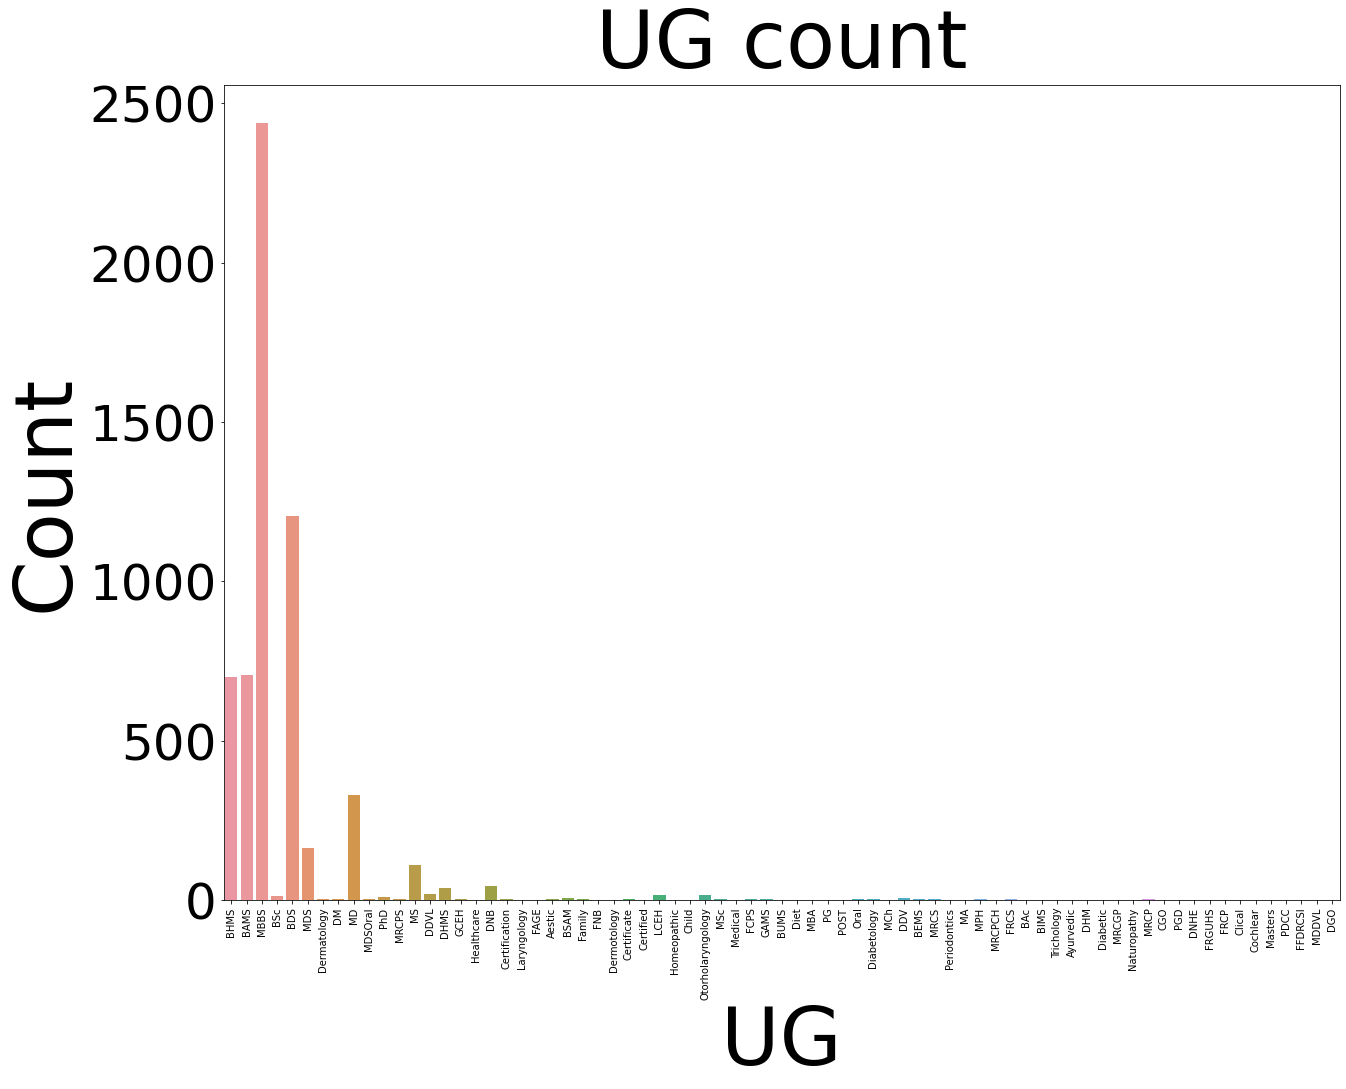

In [60]:
#count plot for categorical variable 
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=Doc, x="UG")
plt.xticks(rotation=90)
plt.yticks(fontsize=50)
plt.xlabel("UG",fontsize=80)
plt.ylabel("Count",fontsize=80)
plt.title("UG count", fontsize = 80)
Doc["UG"].value_counts()

### MBBS seems to have the Highest count in qualification

Bangalore             1251
Mumbai                1207
Delhi                 1175
Hyderabad              948
Chennai                847
Coimbatore             228
Ernakulam              152
Thiruvananthapuram      86
Name: City, dtype: int64

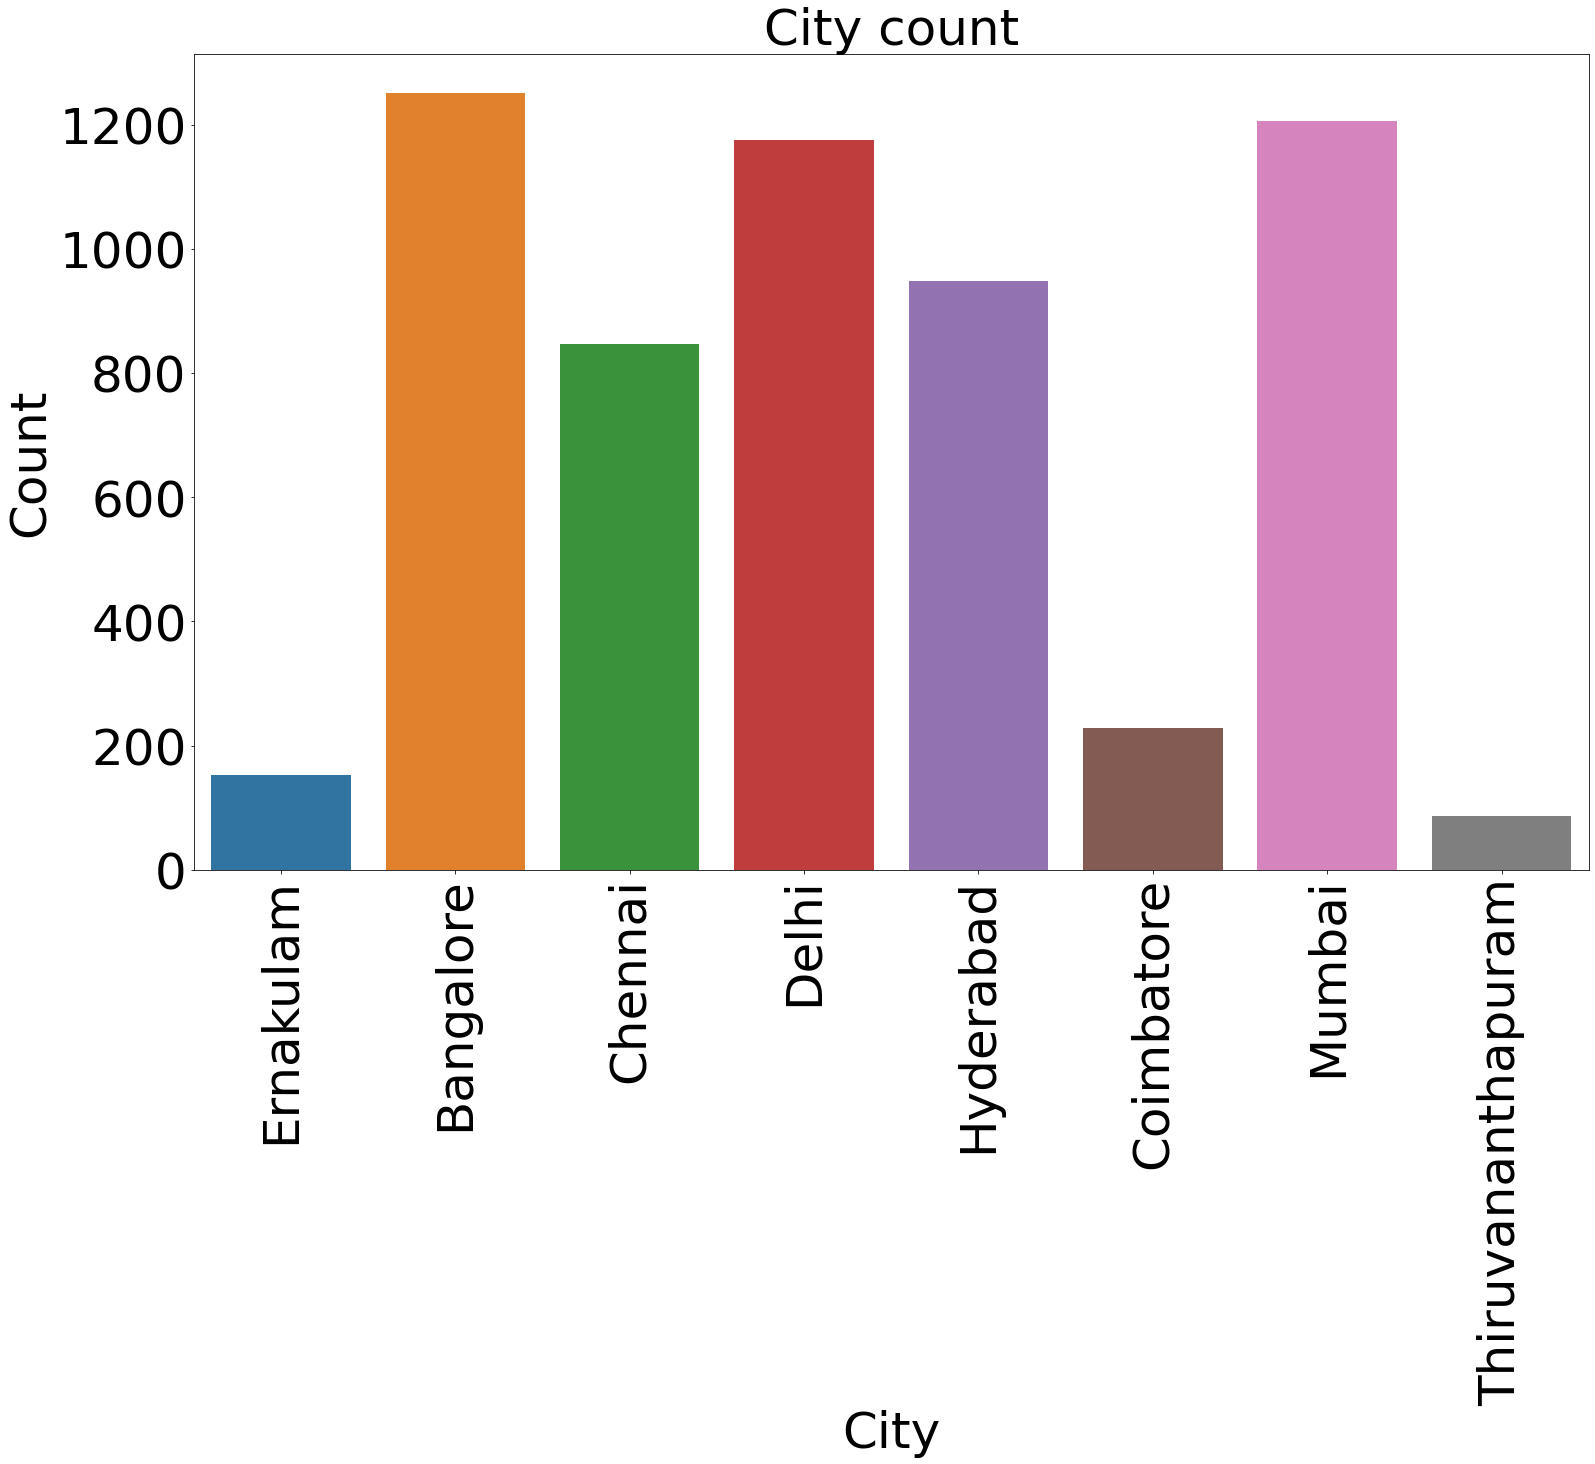

In [61]:
#count plot for categorical variable 
fig_size = (25,15)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=Doc, x="City")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel("City",fontsize=50)
plt.ylabel("Count",fontsize=50)
plt.title("City count", fontsize = 50)
Doc["City"].value_counts()

#### The Banglore population count is highest of all, followed by mumbai at 1207, delhi at 1175, Hyderbad at 948 and so on

Dentist             1391
General Medicine    1164
Dermatologists      1002
Homeopath            828
Ayurveda             784
ENT Specialist       725
Name: Profile, dtype: int64

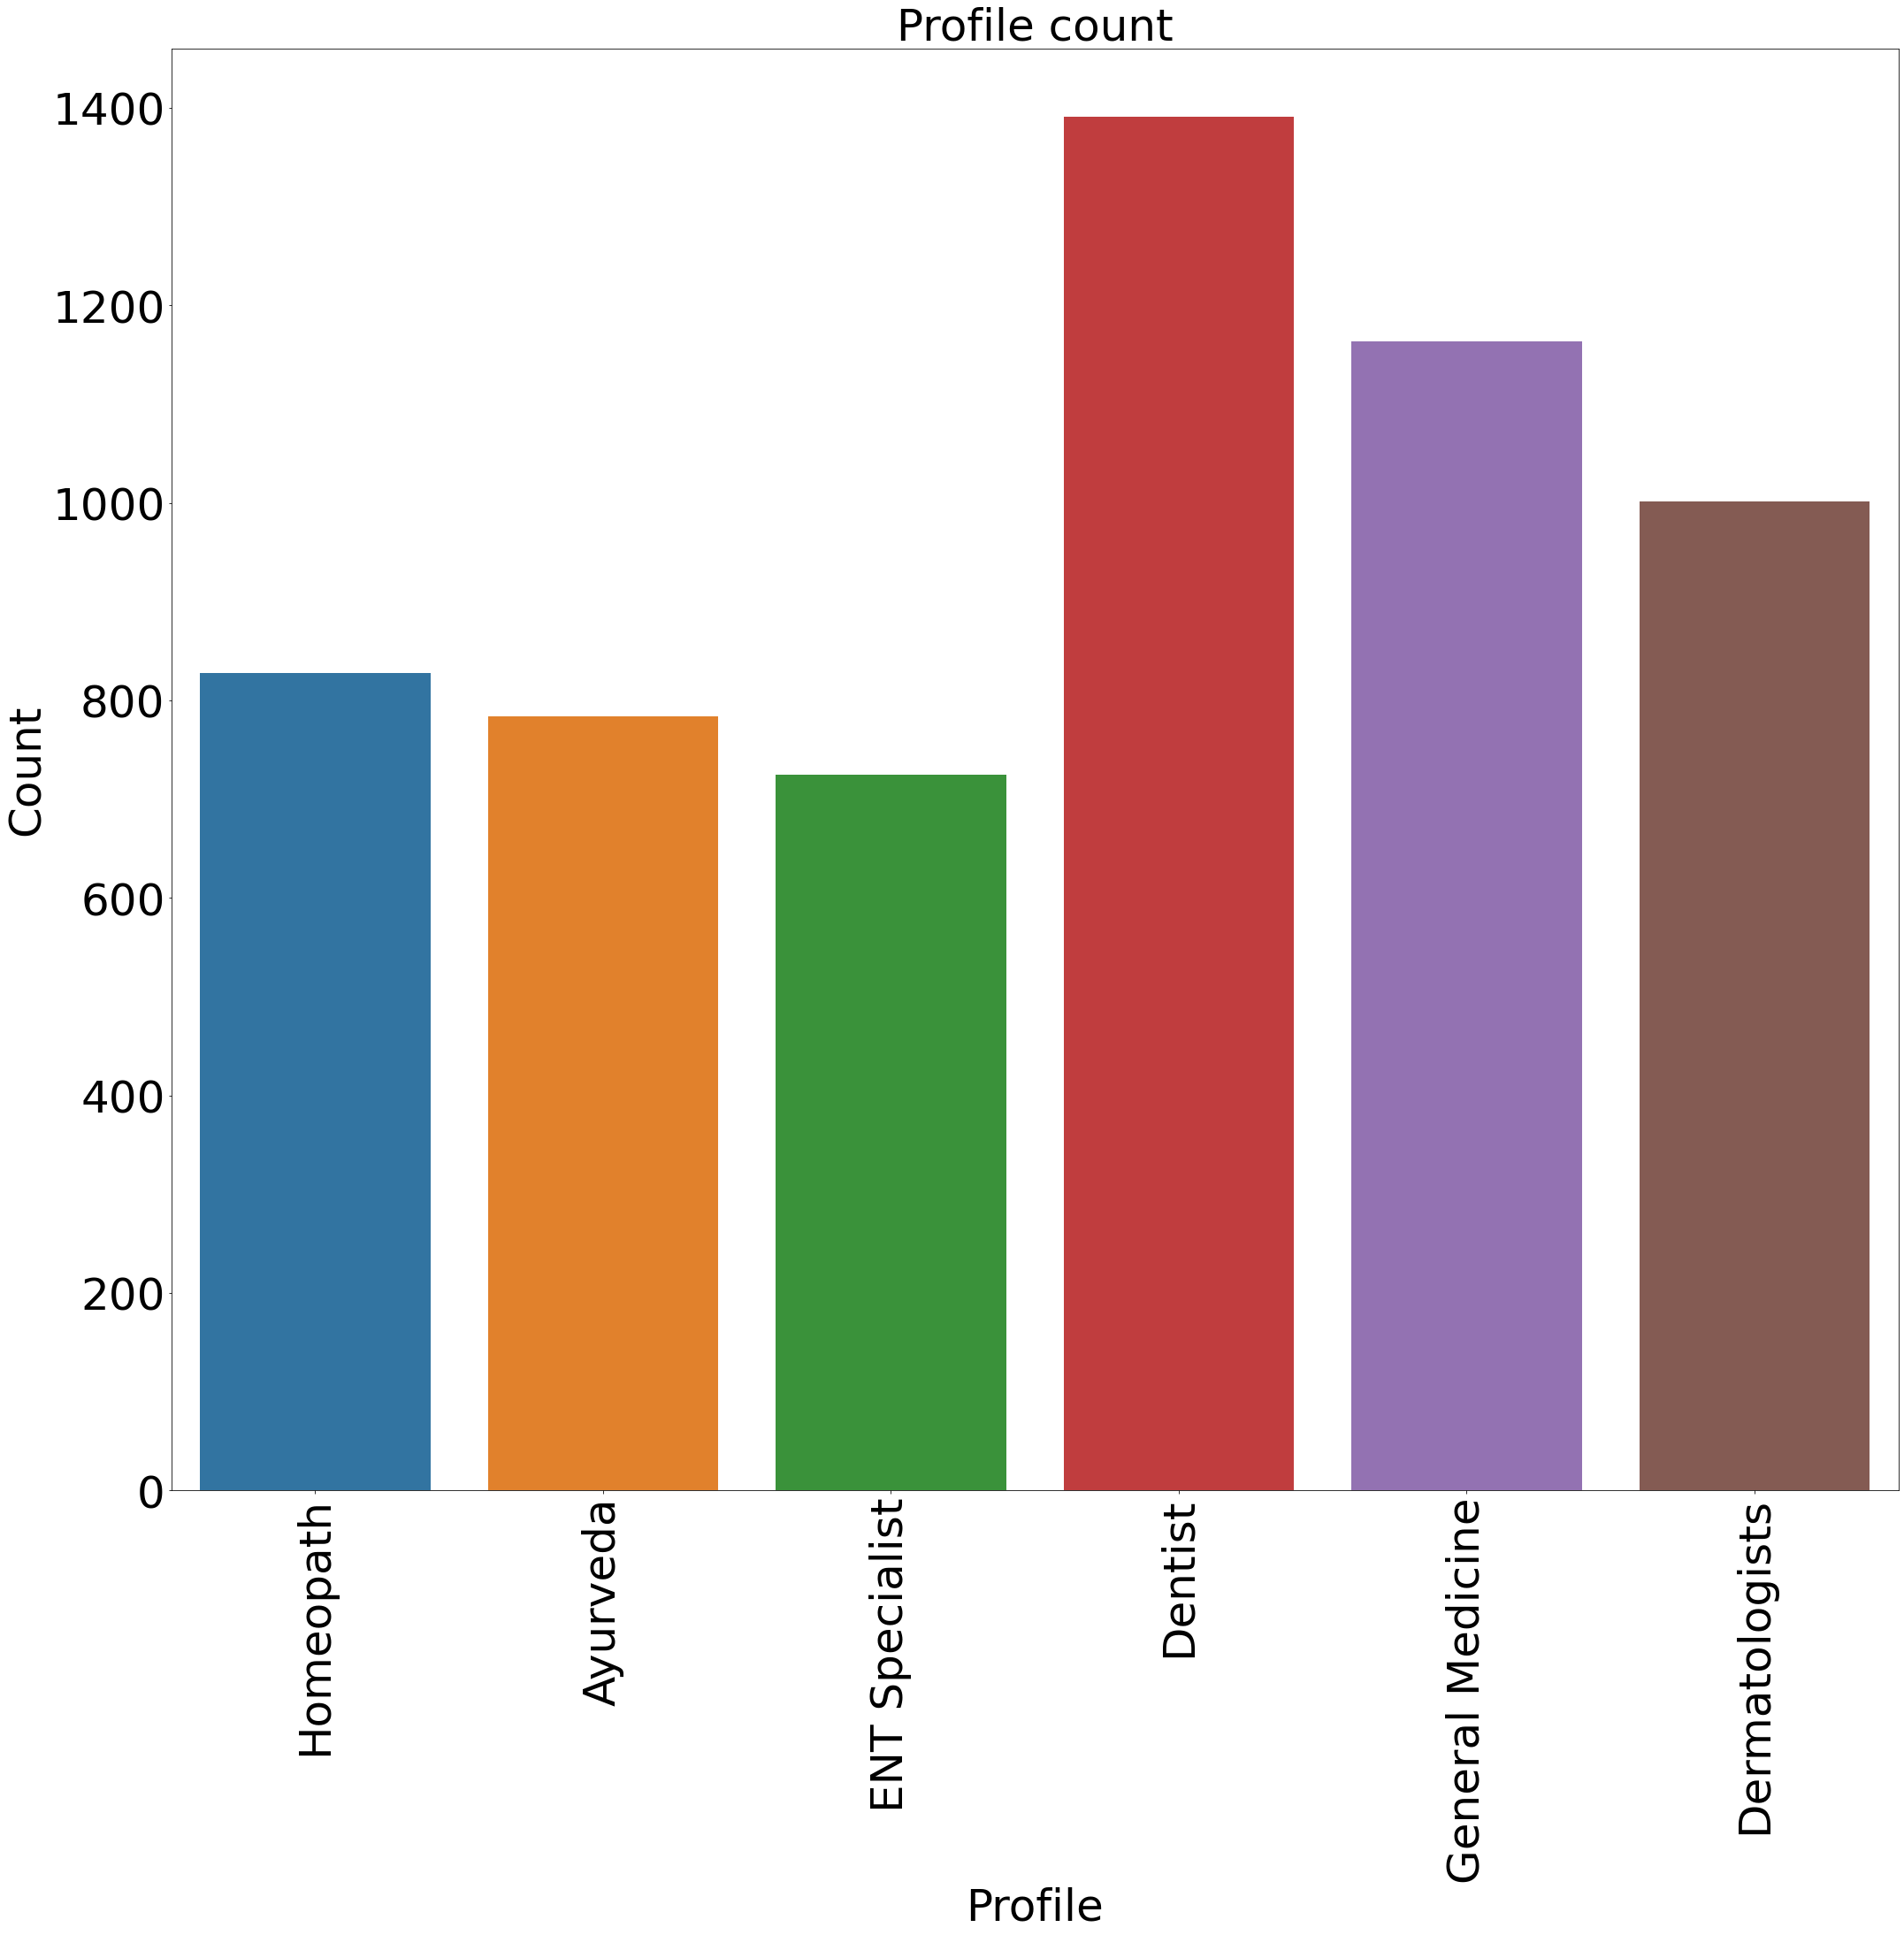

In [62]:
#count plot for categorical variable 
fig_size = (35,30)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=Doc, x="Profile")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel("Profile",fontsize=50)
plt.ylabel("Count",fontsize=50)
plt.title("Profile count", fontsize = 50)
Doc["Profile"].value_counts()

### dentist have the highest count of all followed by General medicine and deramtologists. ENT specialist have the lowest count

100    3928
98      288
99      259
97      241
96      220
95      177
94      114
93      108
92       66
90       64
91       60
89       42
88       41
85       27
82       23
83       21
86       21
80       19
77       15
87       14
84       13
79       13
67       12
81       12
71        9
75        8
76        8
73        8
74        7
60        7
78        6
56        5
68        5
69        4
70        4
57        3
72        3
33        2
64        2
62        2
63        2
55        2
48        1
40        1
7         1
65        1
45        1
53        1
47        1
58        1
36        1
Name: Rating, dtype: int64

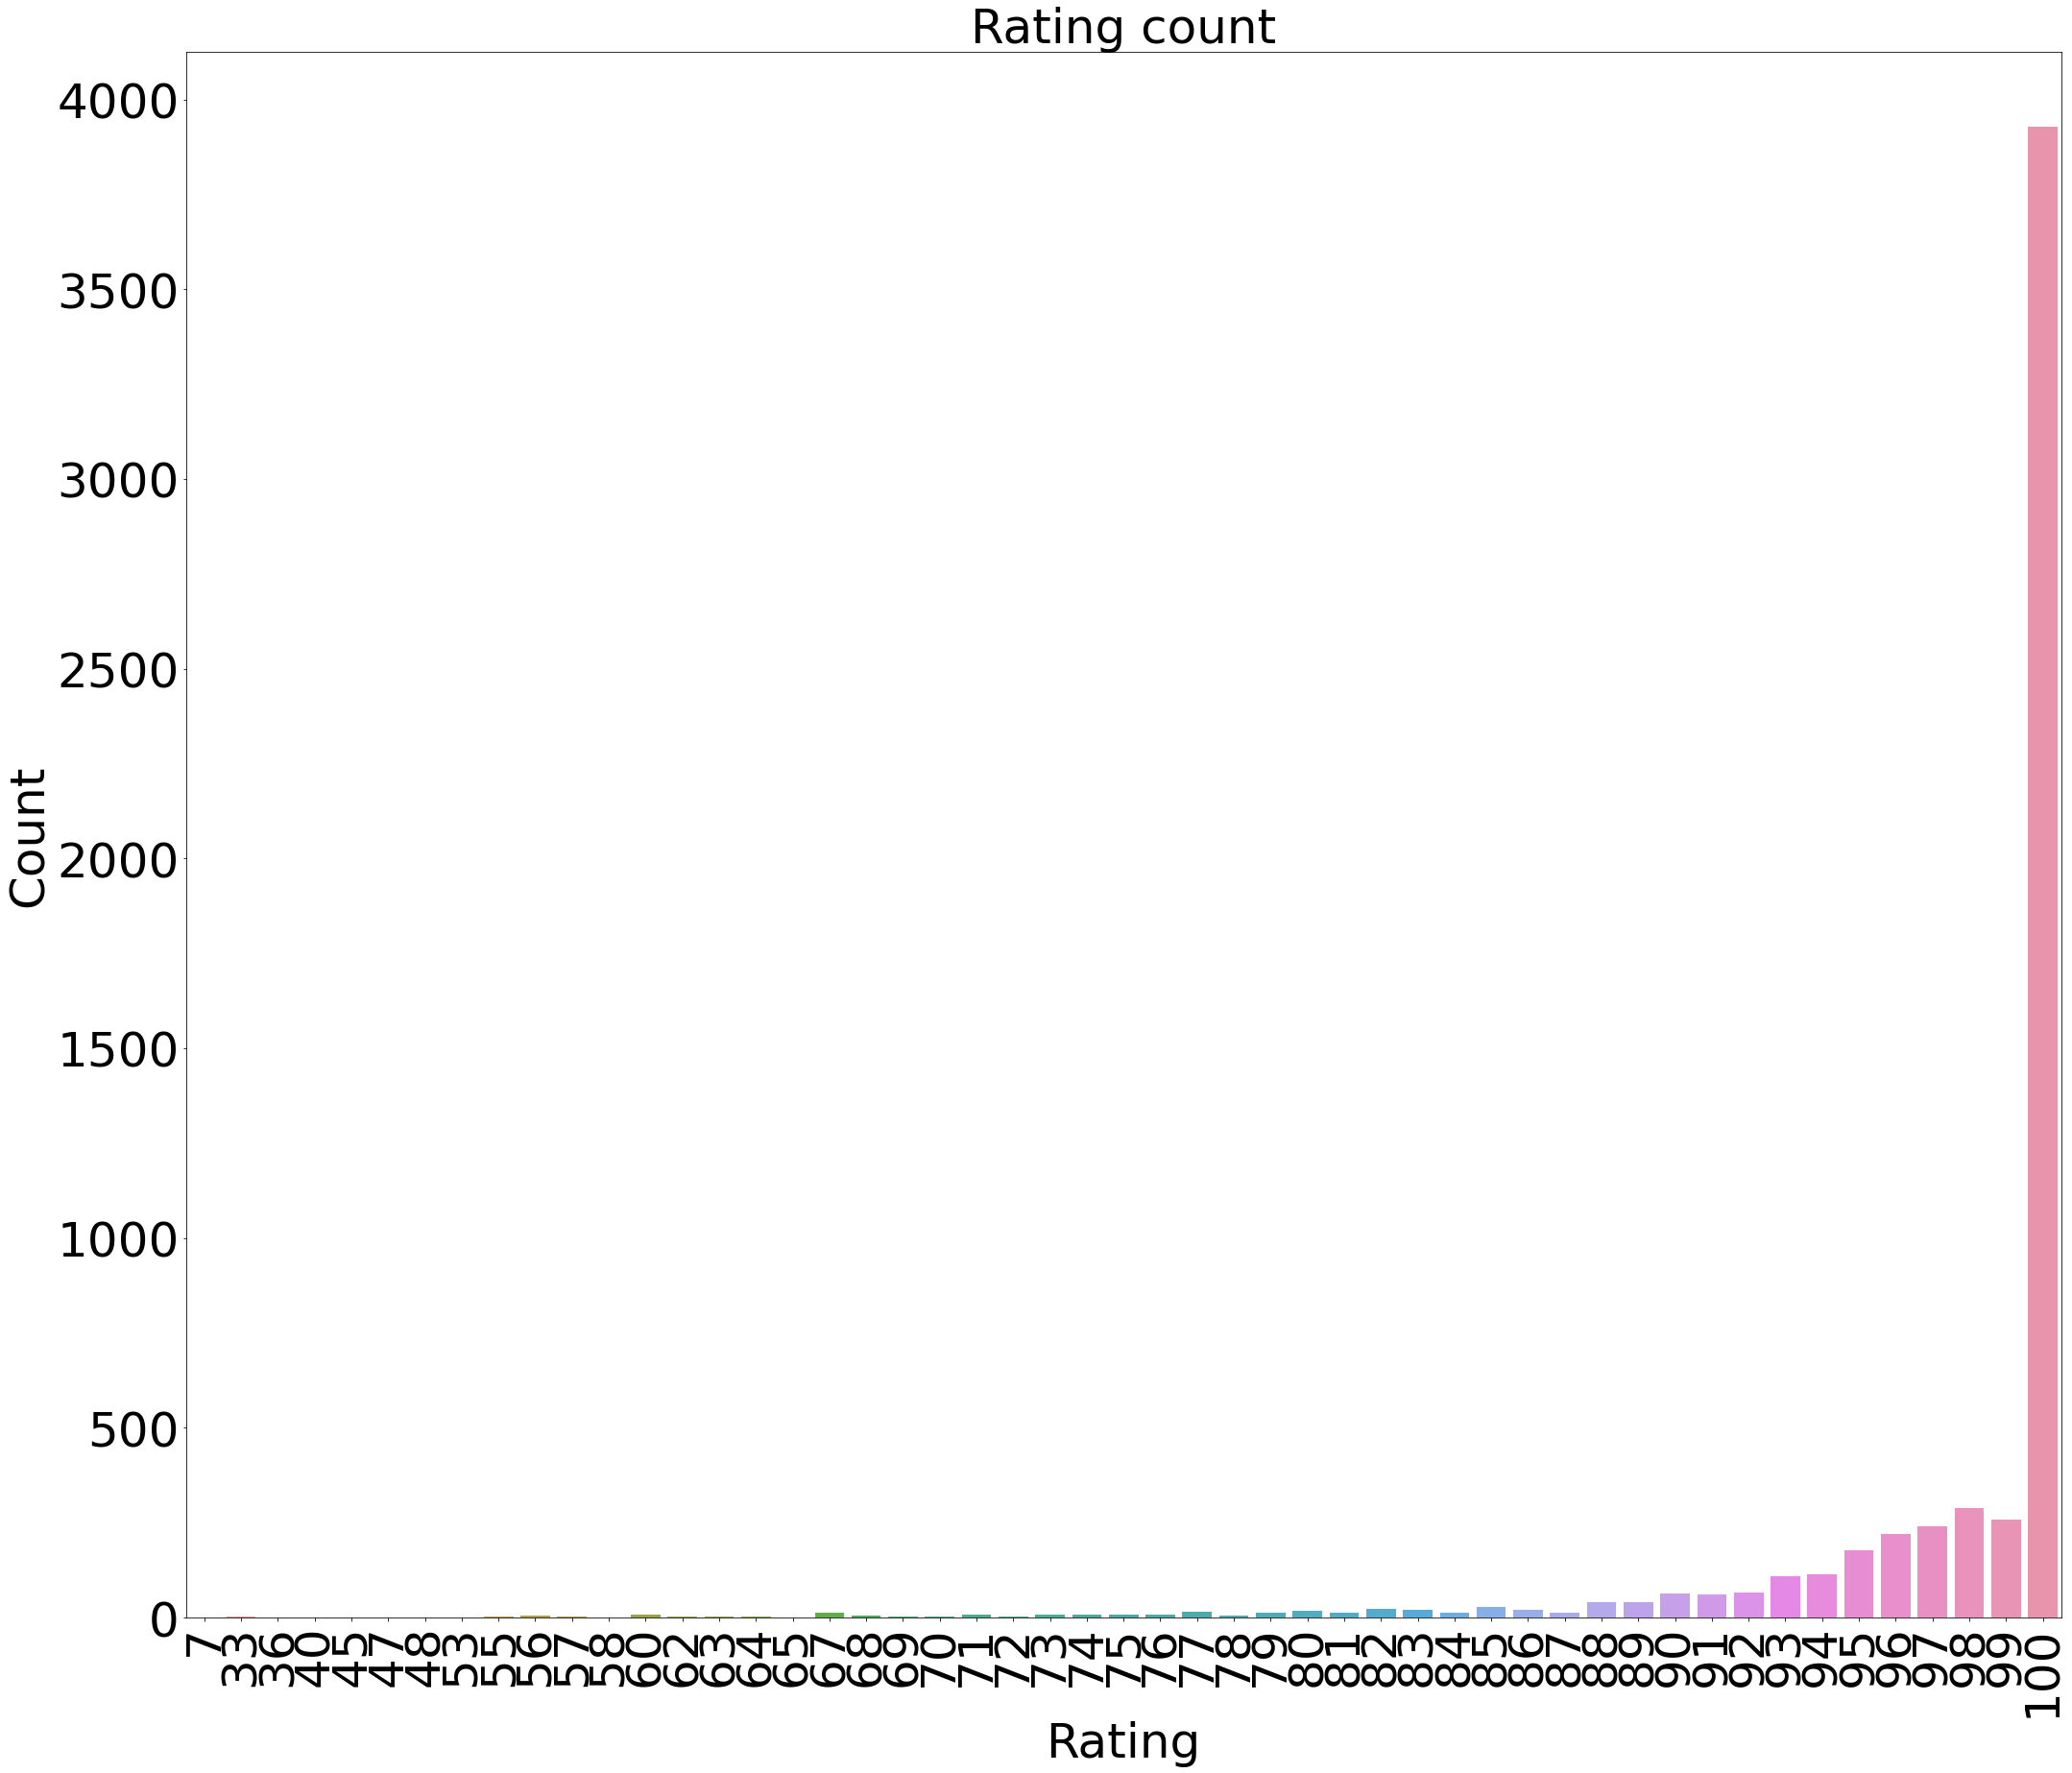

In [63]:
#count plot for categorical variable 
fig_size = (35,30)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=Doc, x="Rating")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel("Rating",fontsize=50)
plt.ylabel("Count",fontsize=50)
plt.title("Rating count", fontsize = 50)
Doc["Rating"].value_counts()

#### Most of the Doctors are rated to give 100% satisfaction and service 

# Bivariate analysis

In [65]:
Doc.columns

Index(['UG', 'City', 'Experience', 'comments', 'Profile', 'Fees', 'Rating'], dtype='object')

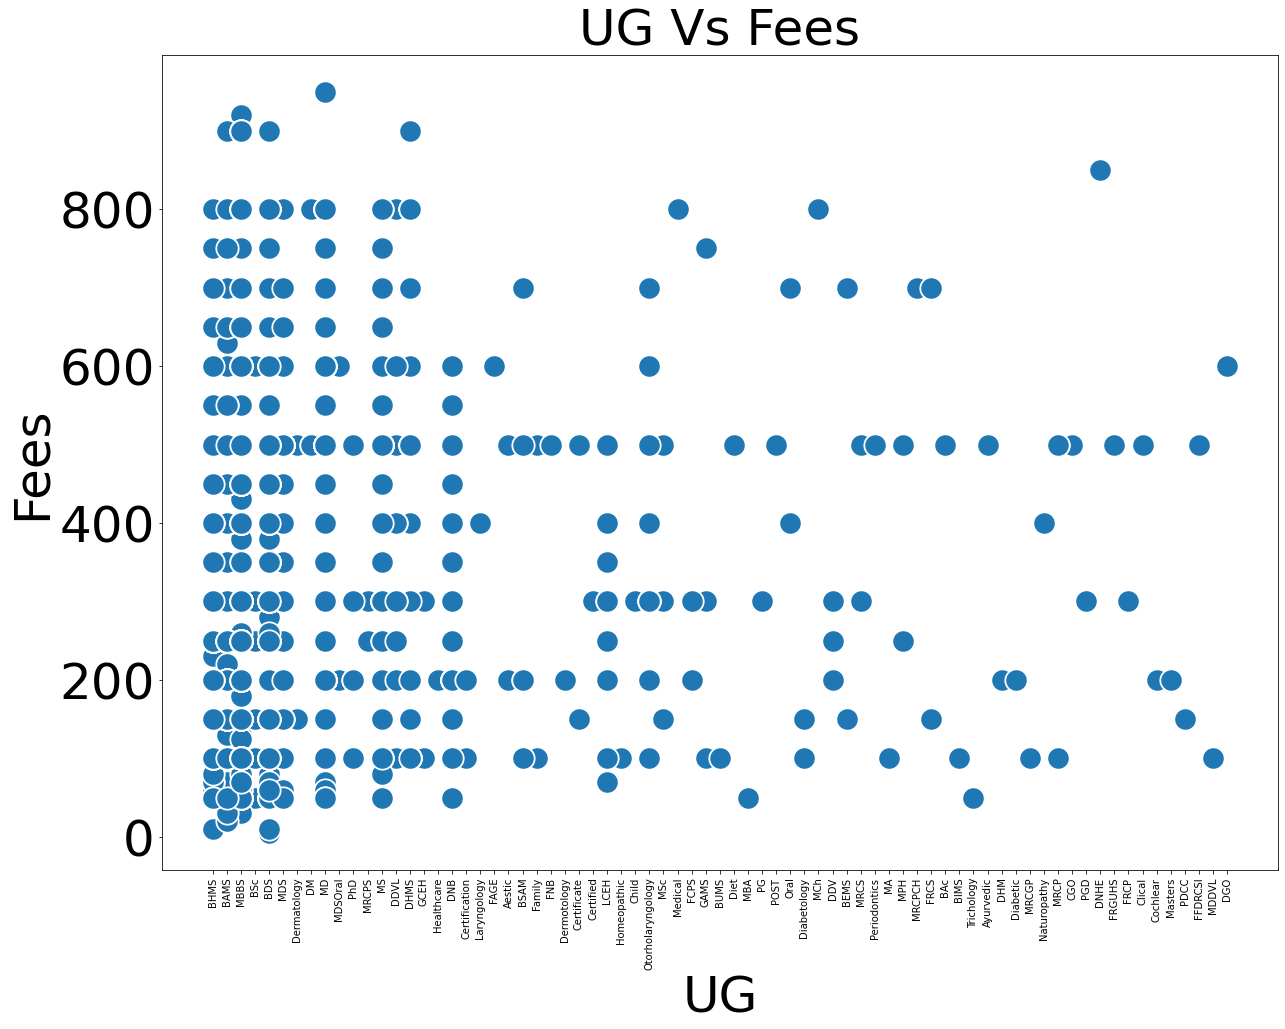

In [66]:
#plot to find relationship 
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("UG Vs Fees", fontsize=50)
plt.xticks(rotation=90)
plt.yticks(fontsize=50)
plt.xlabel("UG",fontsize=50)
plt.ylabel("Fees",fontsize=50)
sns.scatterplot(x="UG", y="Fees", data=Doc, s=500)

#### The fee structure is spread across the Qualified professional doctors yet the density of fee count is in MBBS, BHMS & BAMS

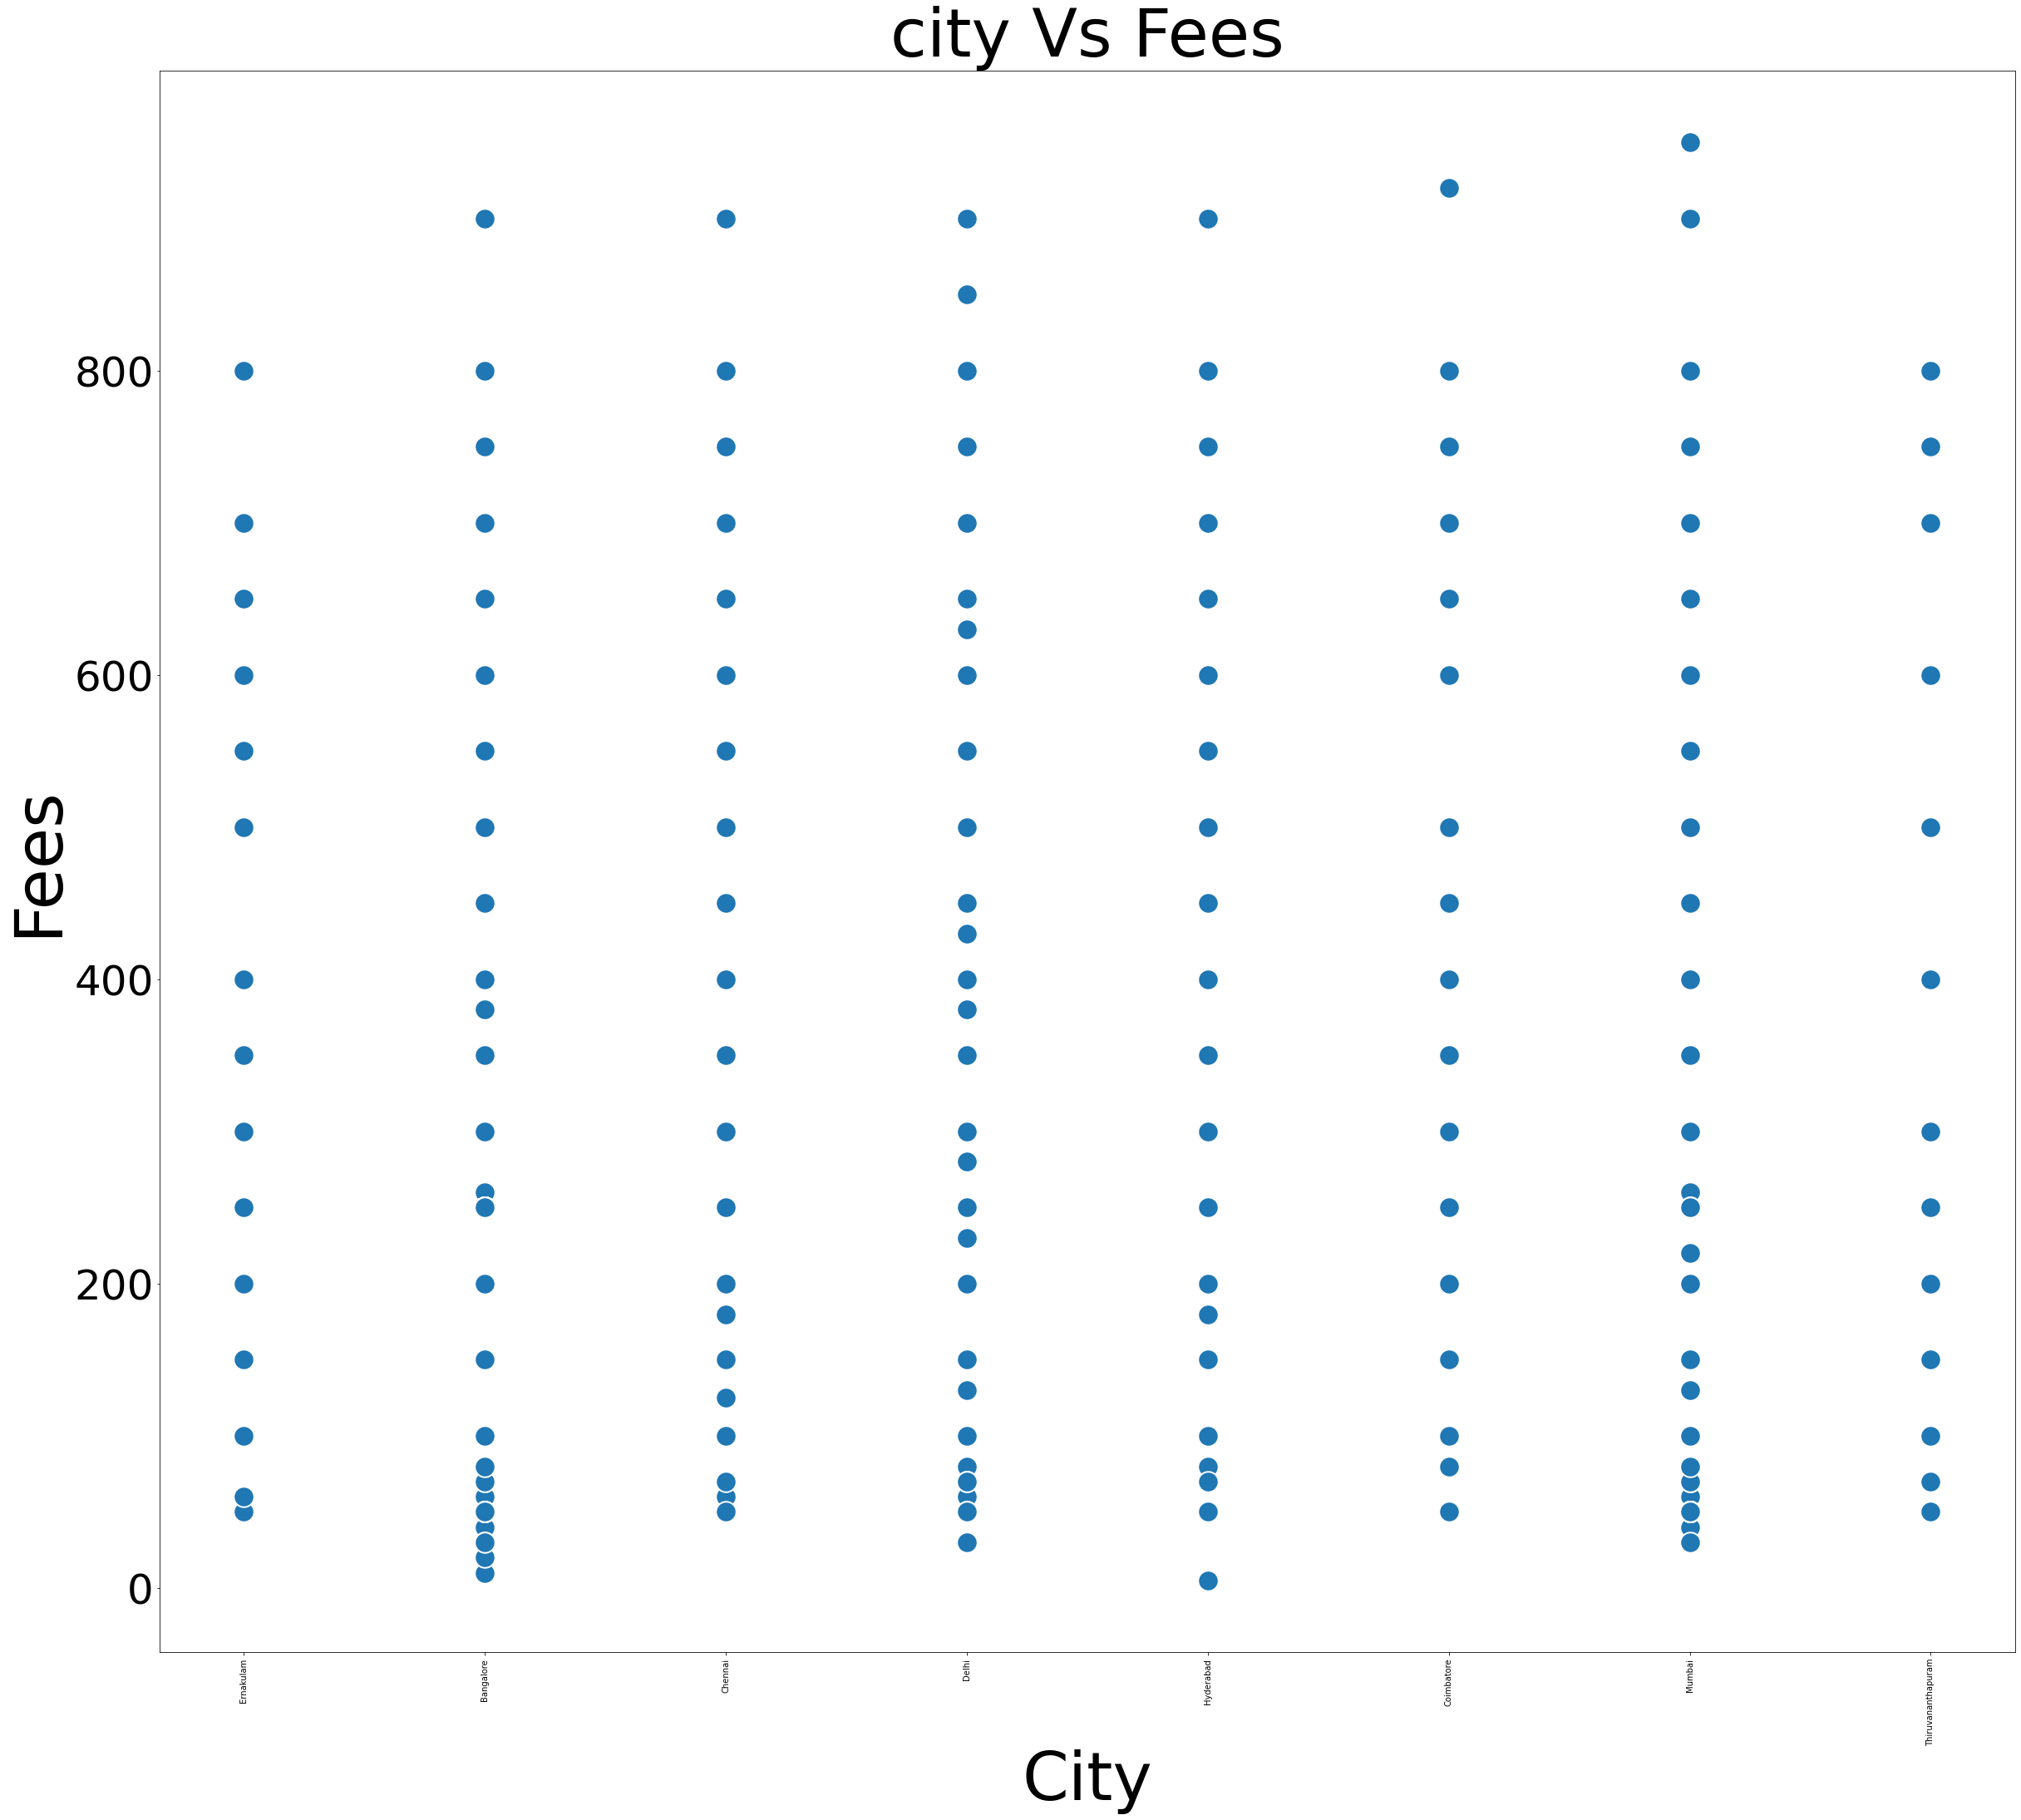

In [67]:
fig_size = (40,35)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("city Vs Fees", fontsize=80)
plt.xticks(rotation=90)
plt.yticks(fontsize=50)
plt.xlabel("City",fontsize=80)
plt.ylabel("Fees",fontsize=80)
sns.scatterplot(x="City", y="Fees", data=Doc, s=600)

#### Bangalore and Mumbai have majority of its fees less than 200 rupees

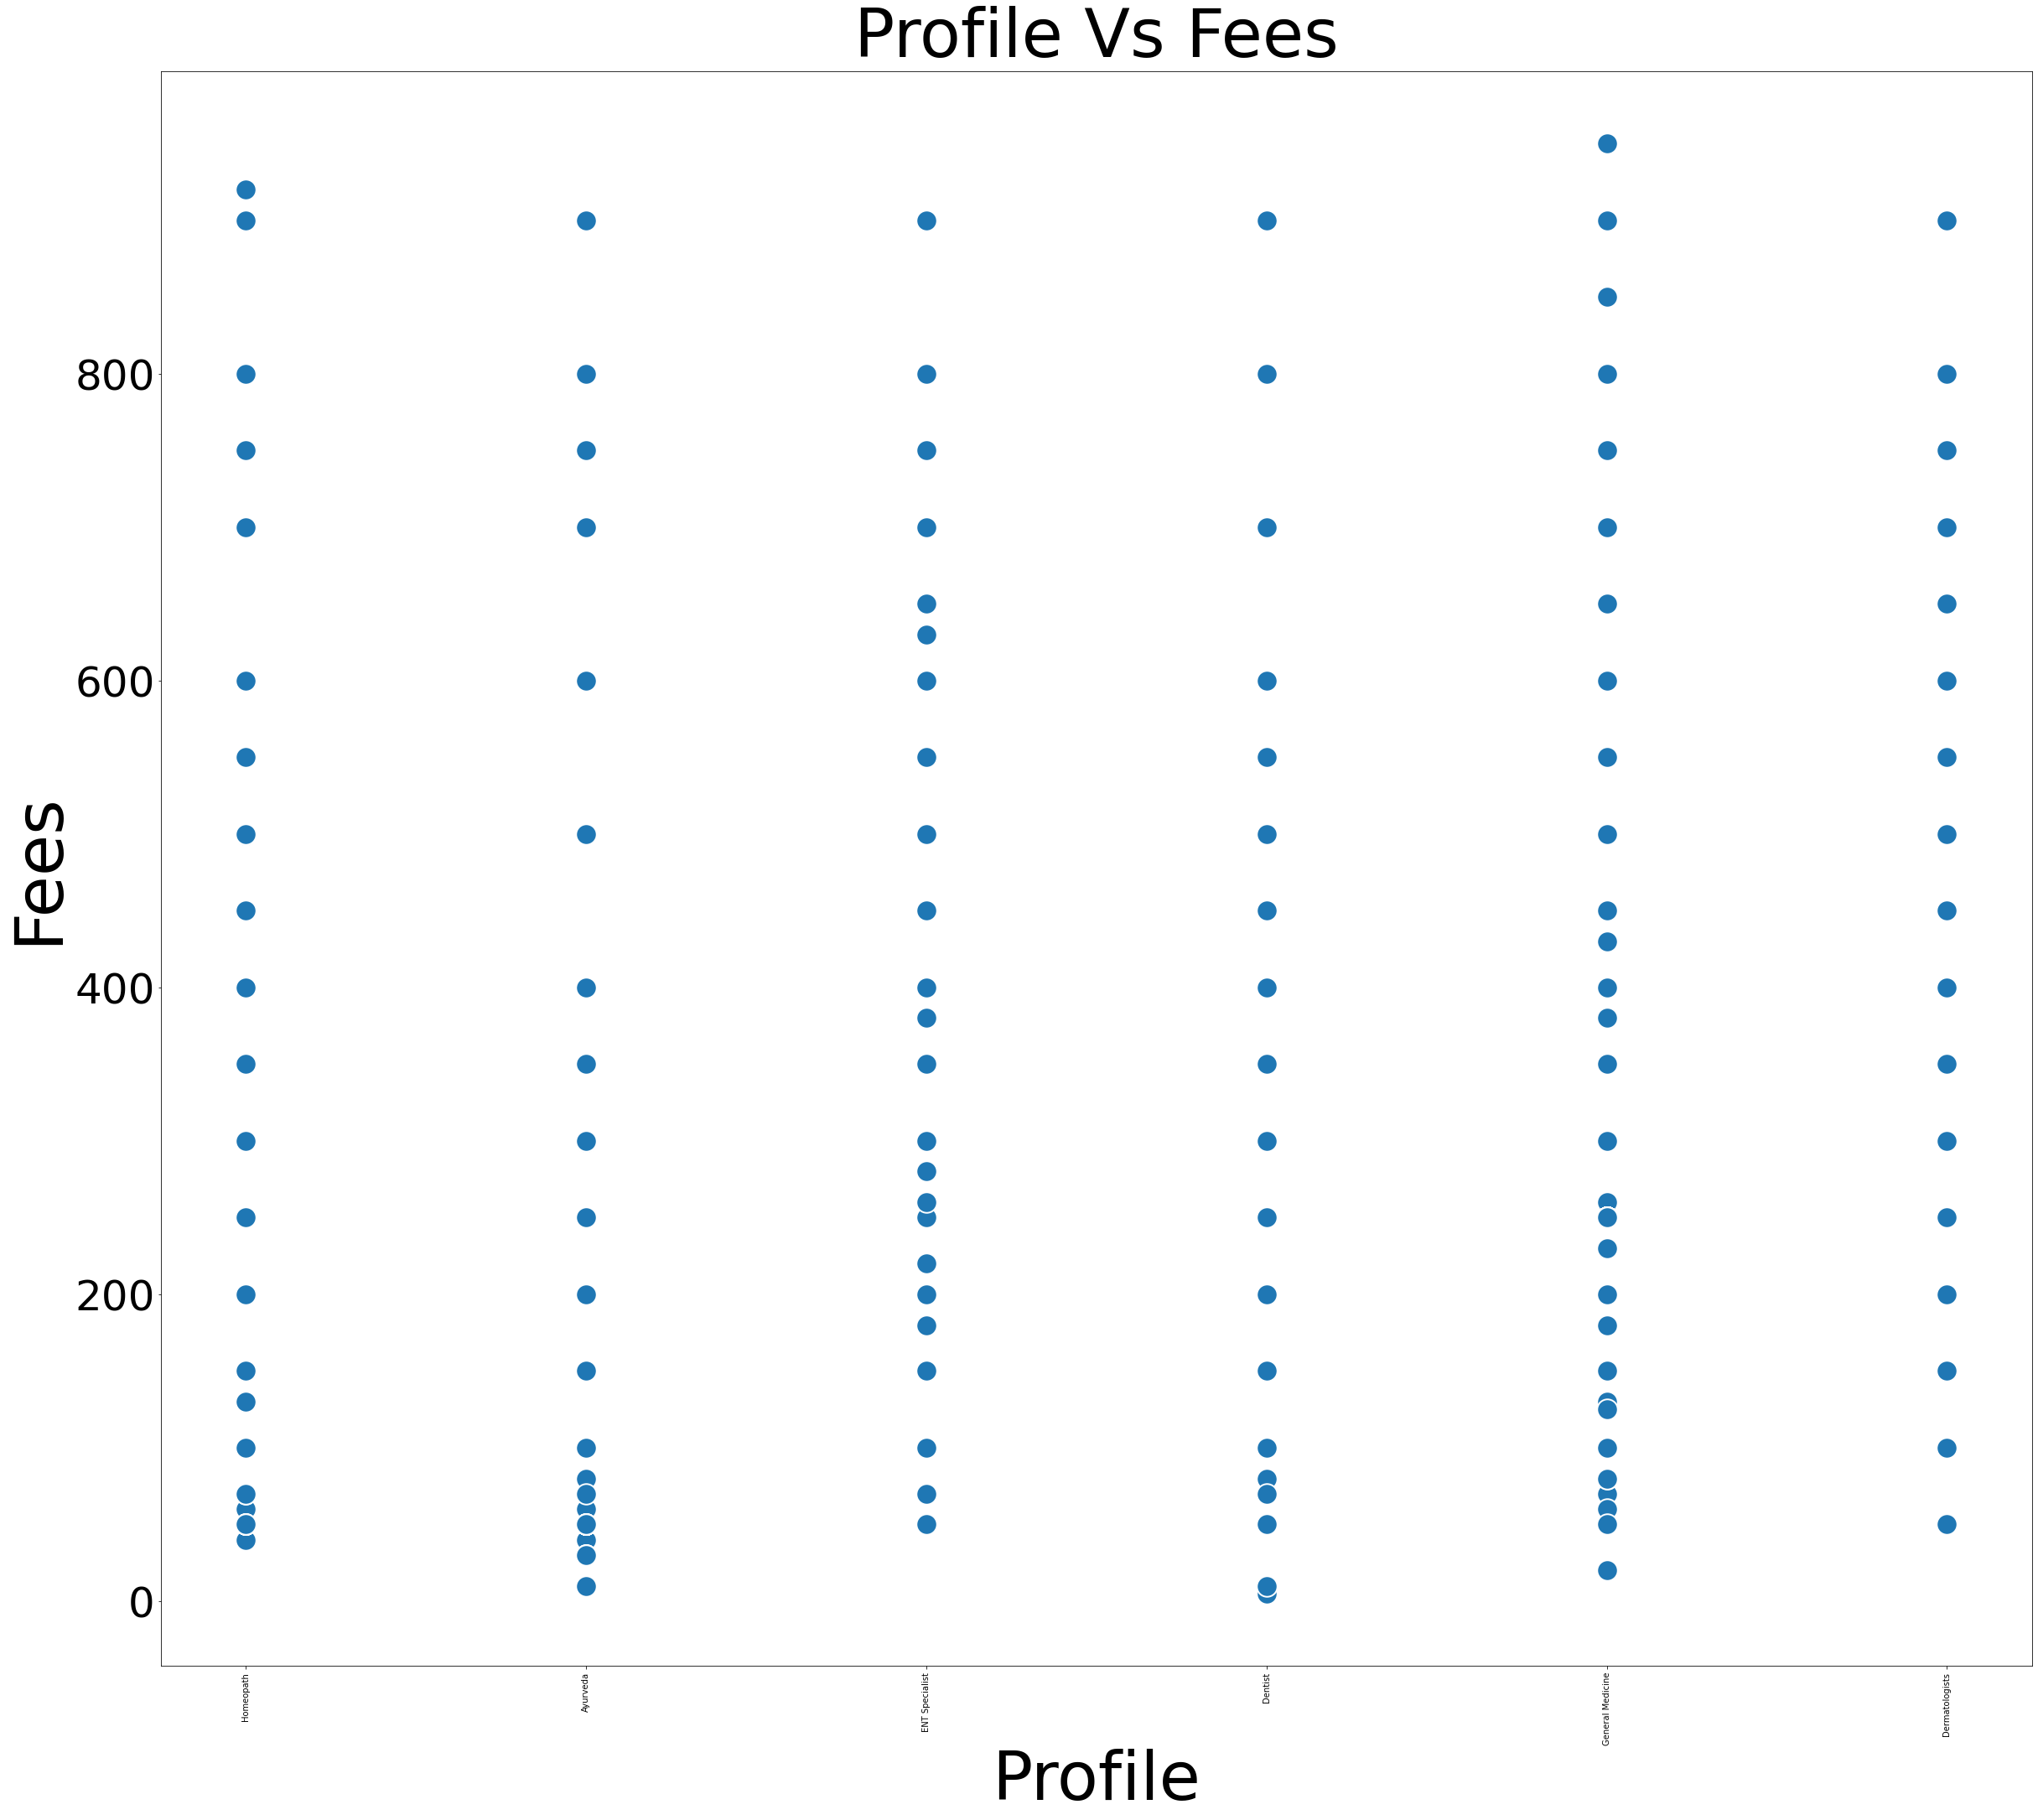

In [68]:
fig_size = (40,35)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Profile Vs Fees", fontsize=80)
plt.xticks(rotation=90)
plt.yticks(fontsize=50)
plt.xlabel("Profile",fontsize=80)
plt.ylabel("Fees",fontsize=80)
sns.scatterplot(x="Profile", y="Fees", data=Doc, s=600)

#### Ayurveda doctor charge less than other profiles

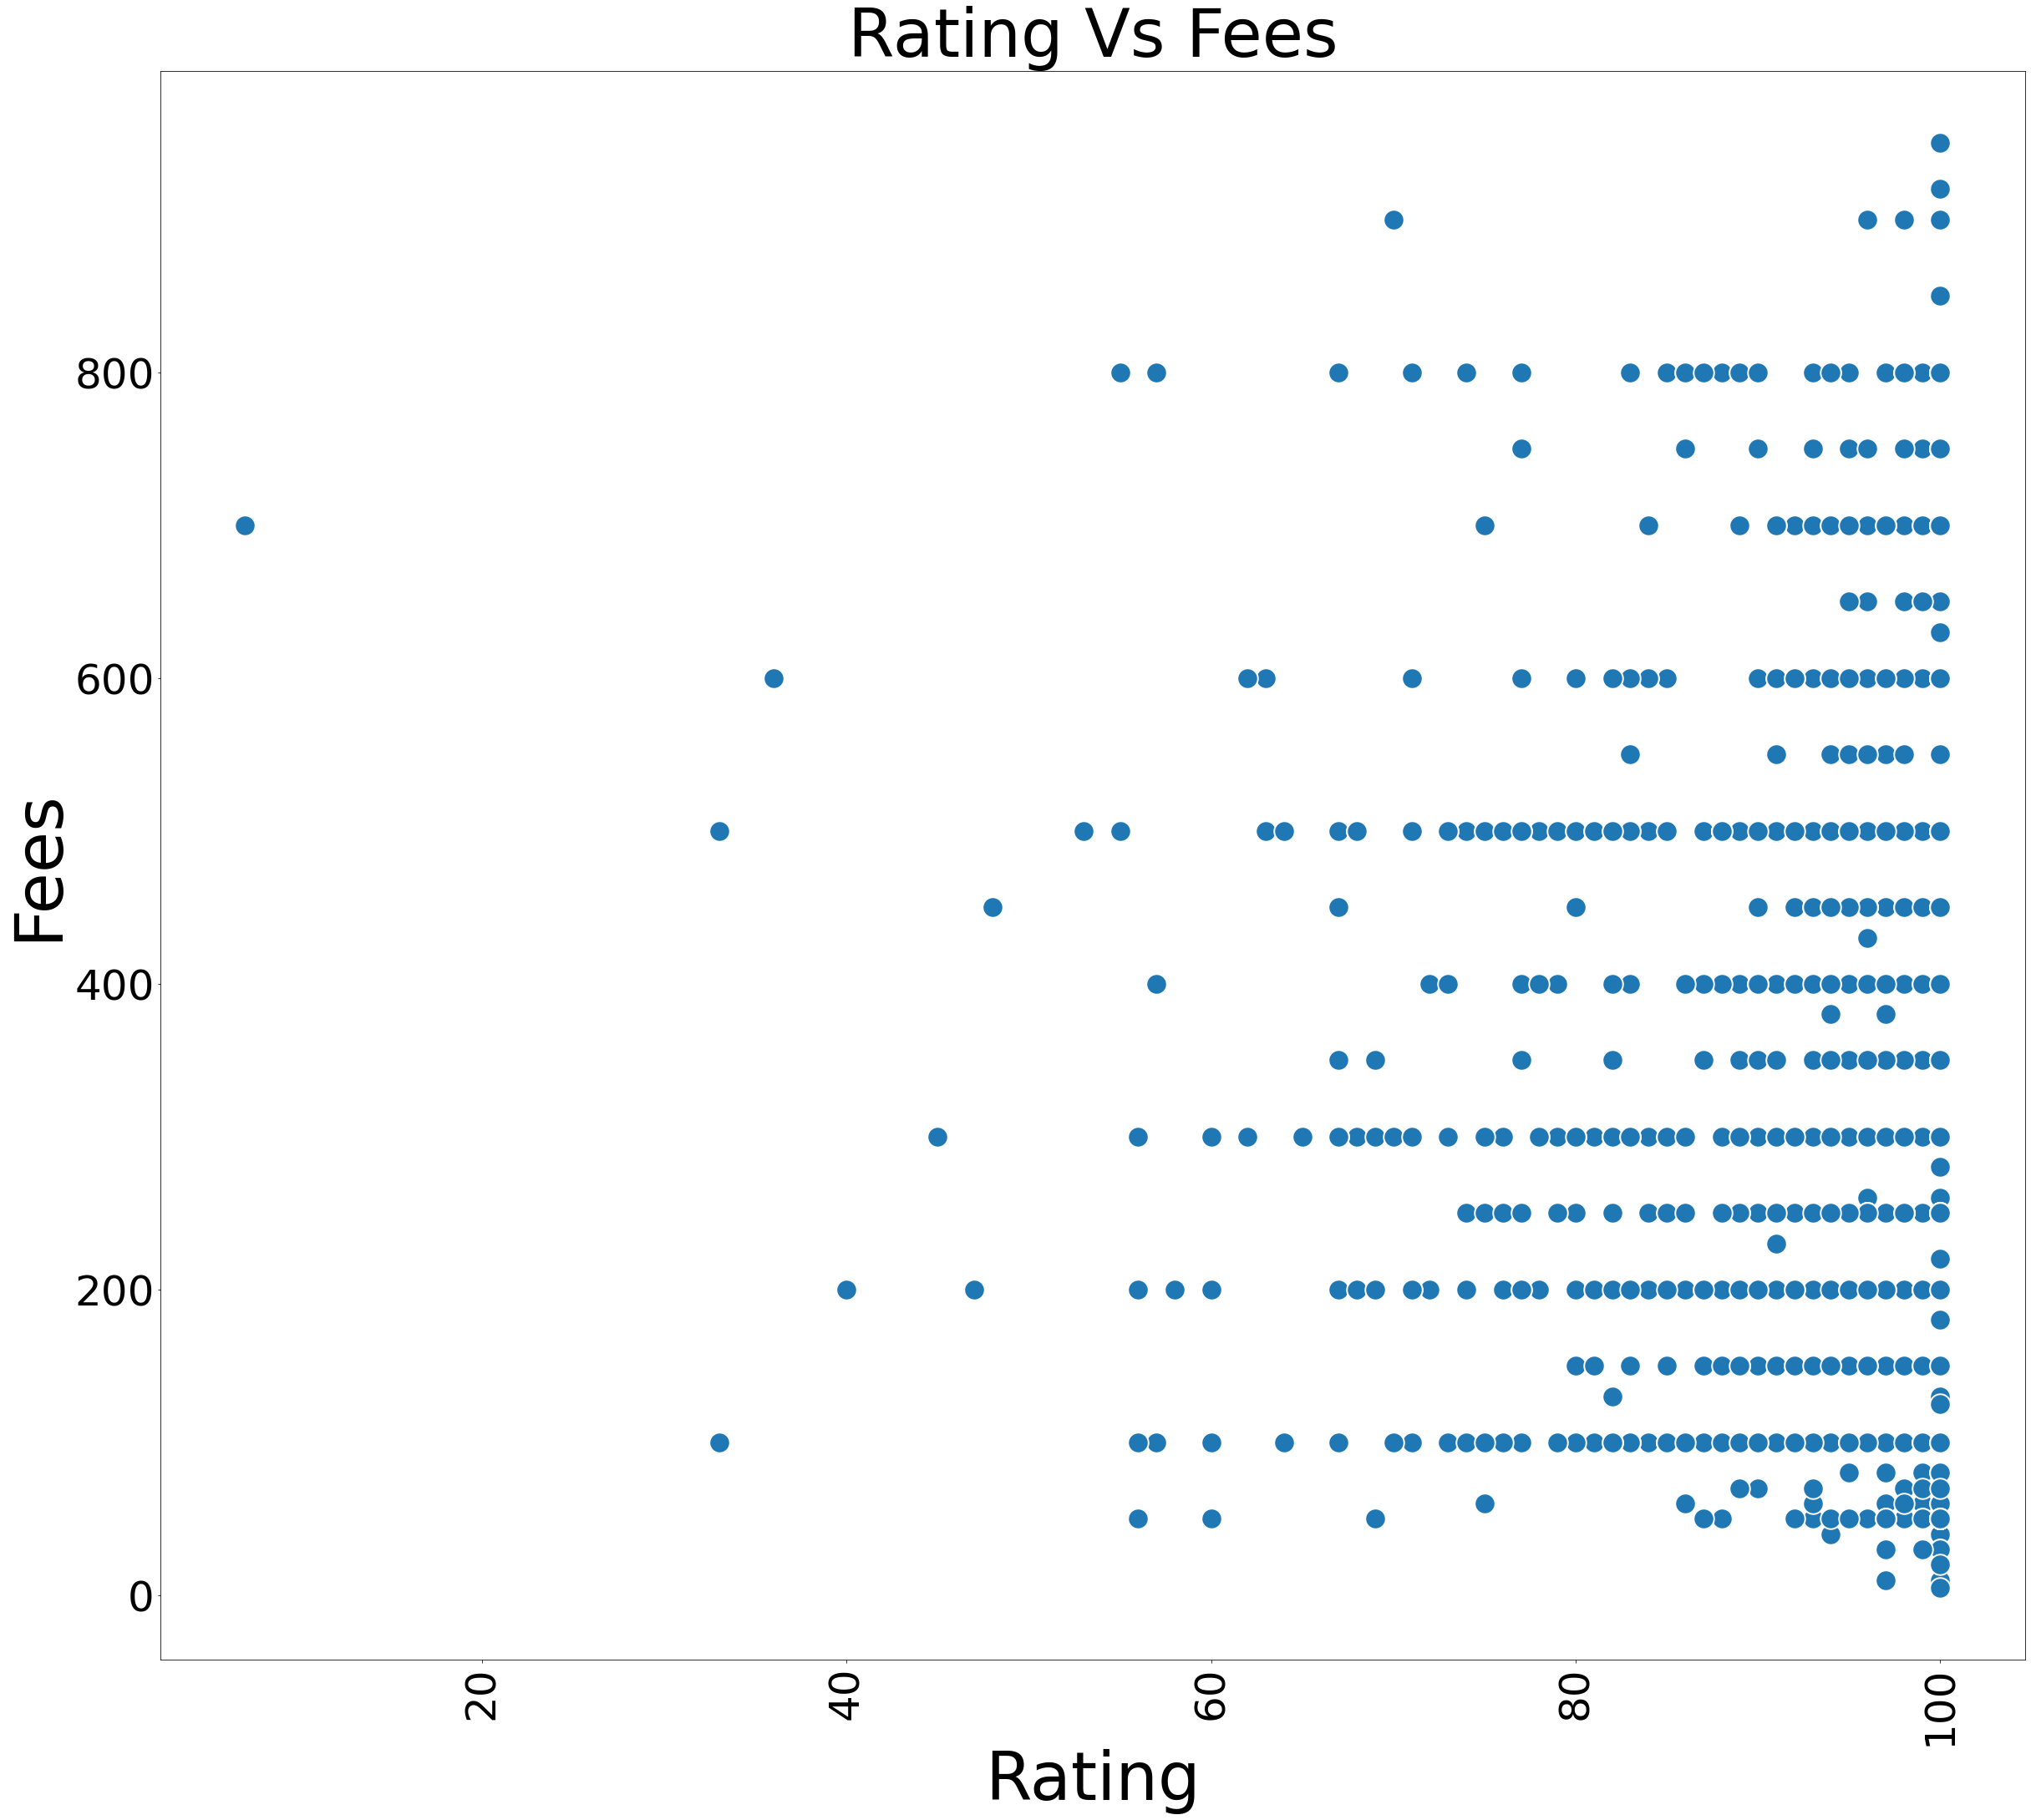

In [69]:
fig_size = (40,35)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Rating Vs Fees", fontsize=80)
plt.xticks(rotation=90, fontsize= 50)
plt.yticks(fontsize=50)
plt.xlabel("Rating",fontsize=80)
plt.ylabel("Fees",fontsize=80)
sns.scatterplot(x="Rating", y="Fees", data=Doc, s=600)

#### Most of the doctor who charges less have gained 100% satisfaction

# Multivariate Analysis

## Summary statistics

In [70]:
Doc.describe()

,Experience,Fees,Rating
count,5894.000000,5894.000000,5894.000000
mean,17.381405,308.781473,97.598575
std,11.115323,190.871002,5.895035
min,0.000000,5.000000,7.000000
25%,9.000000,150.000000,98.000000
50%,15.000000,300.000000,100.000000
75%,23.000000,500.000000,100.000000
max,66.000000,950.000000,100.000000


###  Since other independent variables are categorical they are not included in the summary stat
- huge difference in the range  - needs scalling
- huge difference between mean and standard deviation

### Correlation Matrix

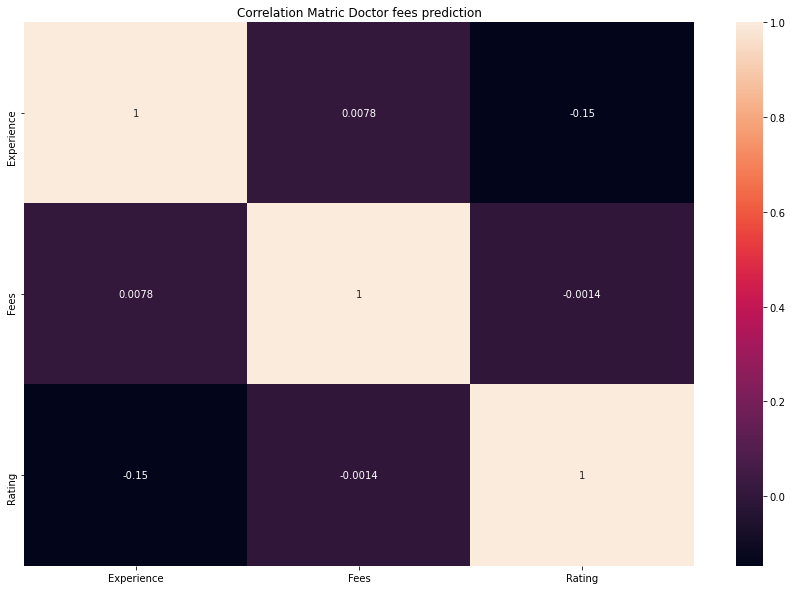

In [72]:
correlation = Doc.corr()
plt.figure(figsize = [15,10])
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matric Doctor fees prediction")
plt.show()

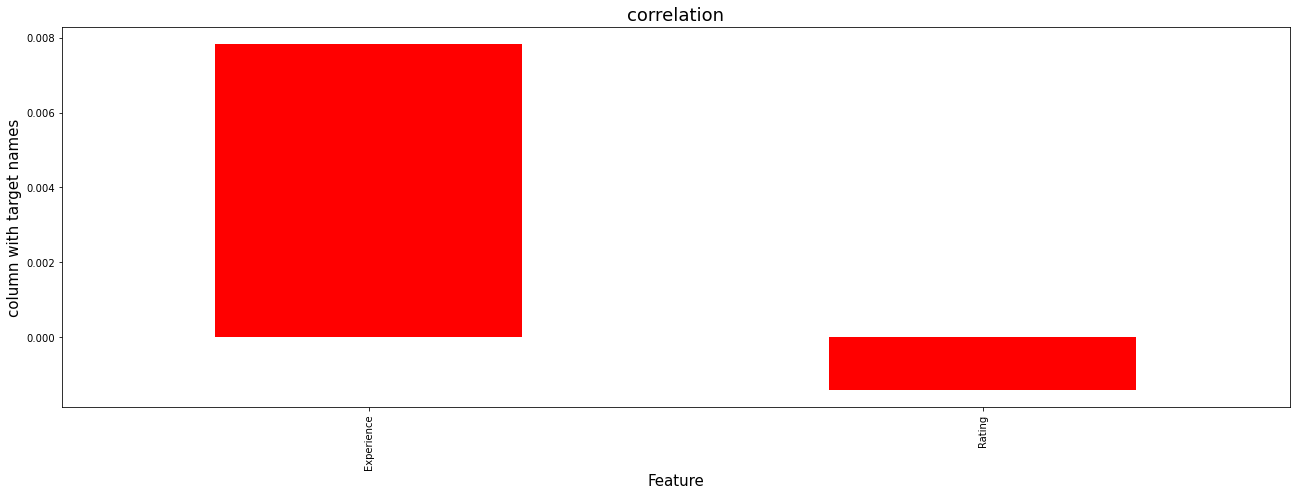

In [73]:
#Arrange feature according to correlation to target variables.
plt.figure(figsize=(22,7))
Doc.corr()["Fees"].sort_values(ascending = False).drop(["Fees"]).plot(kind = "bar", color = "r")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("column with target names", fontsize = 15)
plt.title("correlation", fontsize=18)
plt.show()

### Label encoding

In [74]:
# import the labelencoder
from sklearn.preprocessing import LabelEncoder

# initialize Labelencoder
LE = LabelEncoder()

Doc["UG"] = LE.fit_transform(Doc["UG"])
    

In [75]:
Doc

,UG,City,Experience,comments,Profile,Fees,Rating
0,6,Ernakulam,24,Unknown,Homeopath,100,100
1,2,Bangalore,12,Unknown,Ayurveda,350,98
2,47,Bangalore,9,Acrylic,ENT Specialist,300,100
3,9,Bangalore,12,Bannerghatta,Ayurveda,250,100
4,2,Chennai,20,Unknown,Ayurveda,250,100
...,...,...,...,...,...,...,...
5931,47,Bangalore,19,Unknown,General Medicine,300,98
5932,47,Chennai,33,Acrylic,Dentist,100,100
5933,47,Delhi,41,Unknown,Homeopath,500,97
5934,47,Mumbai,15,General,Homeopath,100,90


# ONE HOT ENCODING

In [76]:
#Introducing one hot encoder to convert categorical feature 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
toen = ["City", "Profile"]

new2 = ohe.fit_transform(Doc["City"].values.reshape(-1,1)).toarray()
new_df2 = pd.DataFrame(new2)

new = ohe.fit_transform(Doc["Profile"].values.reshape(-1,1)).toarray()
new_df = pd.DataFrame(new, columns = [np.unique(Doc["Profile"])])



In [77]:
new_df

,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
5889,0.0,0.0,0.0,0.0,1.0,0.0
5890,0.0,1.0,0.0,0.0,0.0,0.0
5891,0.0,0.0,0.0,0.0,0.0,1.0
5892,0.0,0.0,0.0,0.0,0.0,1.0


In [78]:
#concat encoded profile with data frame
Doc = pd.concat([Doc, new_df], join = "inner", axis = 1)

In [79]:
Doc.head()


,UG,City,Experience,comments,Profile,Fees,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)"
0,6,Ernakulam,24,Unknown,Homeopath,100,100,0.0,0.0,0.0,0.0,0.0,1.0
1,2,Bangalore,12,Unknown,Ayurveda,350,98,1.0,0.0,0.0,0.0,0.0,0.0
2,47,Bangalore,9,Acrylic,ENT Specialist,300,100,0.0,0.0,0.0,1.0,0.0,0.0
3,9,Bangalore,12,Bannerghatta,Ayurveda,250,100,1.0,0.0,0.0,0.0,0.0,0.0
4,2,Chennai,20,Unknown,Ayurveda,250,100,1.0,0.0,0.0,0.0,0.0,0.0


- successfully joined

In [80]:
#drop the orginal column
Doc = Doc.drop("Profile", axis=1)

In [81]:
Doc.head()

,UG,City,Experience,comments,Fees,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)"
0,6,Ernakulam,24,Unknown,100,100,0.0,0.0,0.0,0.0,0.0,1.0
1,2,Bangalore,12,Unknown,350,98,1.0,0.0,0.0,0.0,0.0,0.0
2,47,Bangalore,9,Acrylic,300,100,0.0,0.0,0.0,1.0,0.0,0.0
3,9,Bangalore,12,Bannerghatta,250,100,1.0,0.0,0.0,0.0,0.0,0.0
4,2,Chennai,20,Unknown,250,100,1.0,0.0,0.0,0.0,0.0,0.0


- Succefully dropped the profile column

In [82]:
#join encoded city column with Doc
Doc = pd.concat([Doc, new_df2], join = "inner", axis = 1)

In [83]:
Doc.head()

,UG,City,Experience,comments,Fees,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)",0,1,2,3,4,5,6,7
0,6,Ernakulam,24,Unknown,100,100,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,Bangalore,12,Unknown,350,98,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47,Bangalore,9,Acrylic,300,100,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,Bangalore,12,Bannerghatta,250,100,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,Chennai,20,Unknown,250,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


- columns added

In [86]:
#drop city
Doc 

,UG,City,Experience,comments,Fees,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)",0,1,2,3,4,5,6,7
0,6,Ernakulam,24,Unknown,100,100,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,Bangalore,12,Unknown,350,98,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47,Bangalore,9,Acrylic,300,100,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,Bangalore,12,Bannerghatta,250,100,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,Chennai,20,Unknown,250,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,47,Chennai,19,Acrylic,500,100,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5890,6,Hyderabad,7,Acrylic,600,100,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5891,2,Bangalore,3,Consultation,50,100,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5892,4,Chennai,3,Facial,100,100,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [87]:
Doc = Doc.drop("City", axis=1)

- dropped city column

In [88]:
Doc.head()

,UG,Experience,comments,Fees,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)",0,1,2,3,4,5,6,7
0,6,24,Unknown,100,100,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,12,Unknown,350,98,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47,9,Acrylic,300,100,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,12,Bannerghatta,250,100,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,20,Unknown,250,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Handling Rating column

##### categorizing the rating column for easy of prediction

In [89]:
#apply where 
Doc["Rating"] = np.where(Doc["Rating"]<90,0, Doc["Rating"])
Doc["Rating"] = np.where(Doc["Rating"]>=90,1, Doc["Rating"])


- check the column for unique values

In [90]:
#apply unique for series
Doc["Rating"].unique()

array([1, 0])

In [91]:
#comments seems to be inapproriate for the prediction
Doc = Doc.drop("comments", axis=1)

In [92]:
Doc.head()

,UG,Experience,Fees,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)",0,1,2,3,4,5,6,7
0,6,24,100,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,12,350,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47,9,300,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,12,250,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,20,250,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
Doc["Experience"].unique()

array([24, 12,  9, 20,  8, 42, 10, 14, 23,  5,  7, 21, 19, 41, 31, 25, 16,
       15, 11, 22, 38,  6, 36, 13, 18, 46, 40, 49, 33, 27, 30, 52, 60, 26,
       35, 34, 39, 32, 17,  0, 28, 58,  4, 45, 44,  3, 37, 50, 29, 43, 54,
       66,  2, 51, 47, 48, 53, 56, 61, 59, 57, 55, 65, 64])

In [94]:
Doc["Experience"] = np.where(Doc["Experience"]<=25,0, Doc["Experience"])
Doc["Experience"] = np.where(Doc["Experience"]>25,1, Doc["Experience"])

In [95]:
Doc

,UG,Experience,Fees,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)",0,1,2,3,4,5,6,7
0,6,0,100,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,0,350,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47,0,300,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,0,250,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,250,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,47,0,500,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5890,6,0,600,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5891,2,0,50,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5892,4,0,100,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


- The Label Encoding and One hot encoding is applied and the data is ready for next step

In [96]:
Doc.shape

(5852, 18)

### There are 5852 records and 18 columns

In [97]:
Doc.describe()

,UG,Experience,Fees,Rating,"(Ayurveda,)","(Dentist,)","(Dermatologists,)","(ENT Specialist,)","(General Medicine,)","(Homeopath,)",0,1,2,3,4,5,6,7
count,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000
mean,27.746582,0.205058,308.704375,0.937628,0.132775,0.236500,0.170027,0.123035,0.197881,0.139781,0.212406,0.143882,0.038619,0.199077,0.025461,0.160629,0.205229,0.014696
std,21.859956,0.403779,190.954196,0.241850,0.339361,0.424969,0.375689,0.328505,0.398436,0.346790,0.409046,0.351000,0.192702,0.399340,0.157535,0.367220,0.403903,0.120343
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.000000,0.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.000000,0.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,72.000000,1.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Huge difference between mean and standard deviation
- Huge difference in range

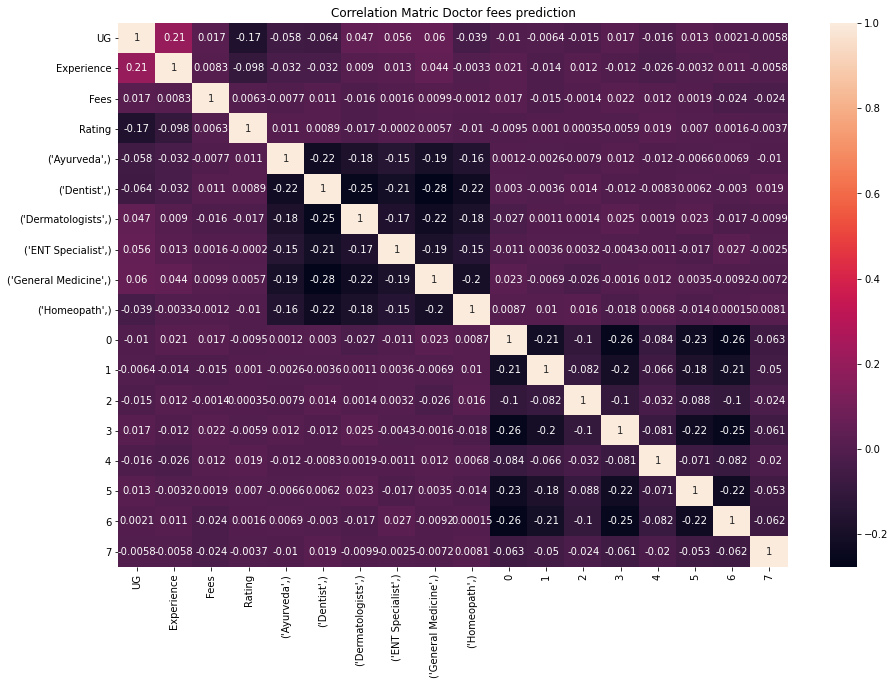

In [98]:
correlation = Doc.corr()
plt.figure(figsize = [15,10])
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matric Doctor fees prediction")
plt.show()

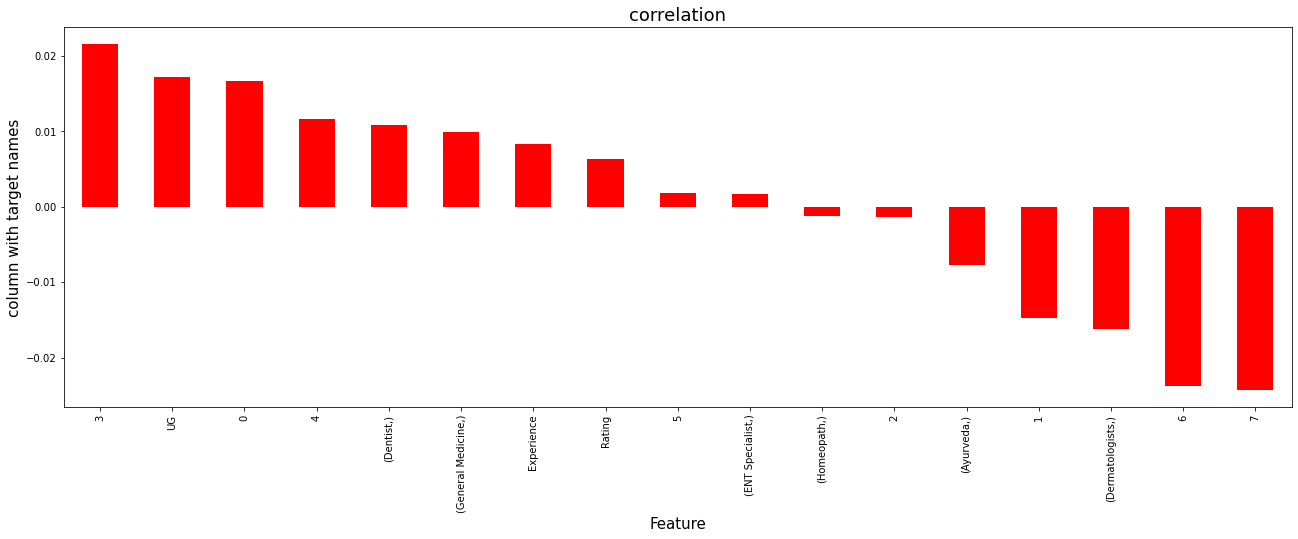

In [99]:
#Arrange feature according to correlation to target variables.
plt.figure(figsize=(22,7))
Doc.corr()["Fees"].sort_values(ascending = False).drop(["Fees"]).plot(kind = "bar", color = "r")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("column with target names", fontsize = 15)
plt.title("correlation", fontsize=18)
plt.show()

In [100]:
correlation["Fees"].sort_values(ascending = False)

Fees                   1.000000
3                      0.021537
UG                     0.017181
0                      0.016674
4                      0.011664
(Dentist,)             0.010885
(General Medicine,)    0.009930
Experience             0.008254
Rating                 0.006318
5                      0.001867
(ENT Specialist,)      0.001643
(Homeopath,)          -0.001203
2                     -0.001427
(Ayurveda,)           -0.007736
1                     -0.014698
(Dermatologists,)     -0.016181
6                     -0.023731
7                     -0.024310
Name: Fees, dtype: float64

In [102]:
Doc.shape

(5852, 18)

### There are 5852 records and 18 columns

# Check for Skewness and removal

- Note:  All the independent variables are of categorical data type hence the skewness will not be involved.

# Check for Outlier and Removal

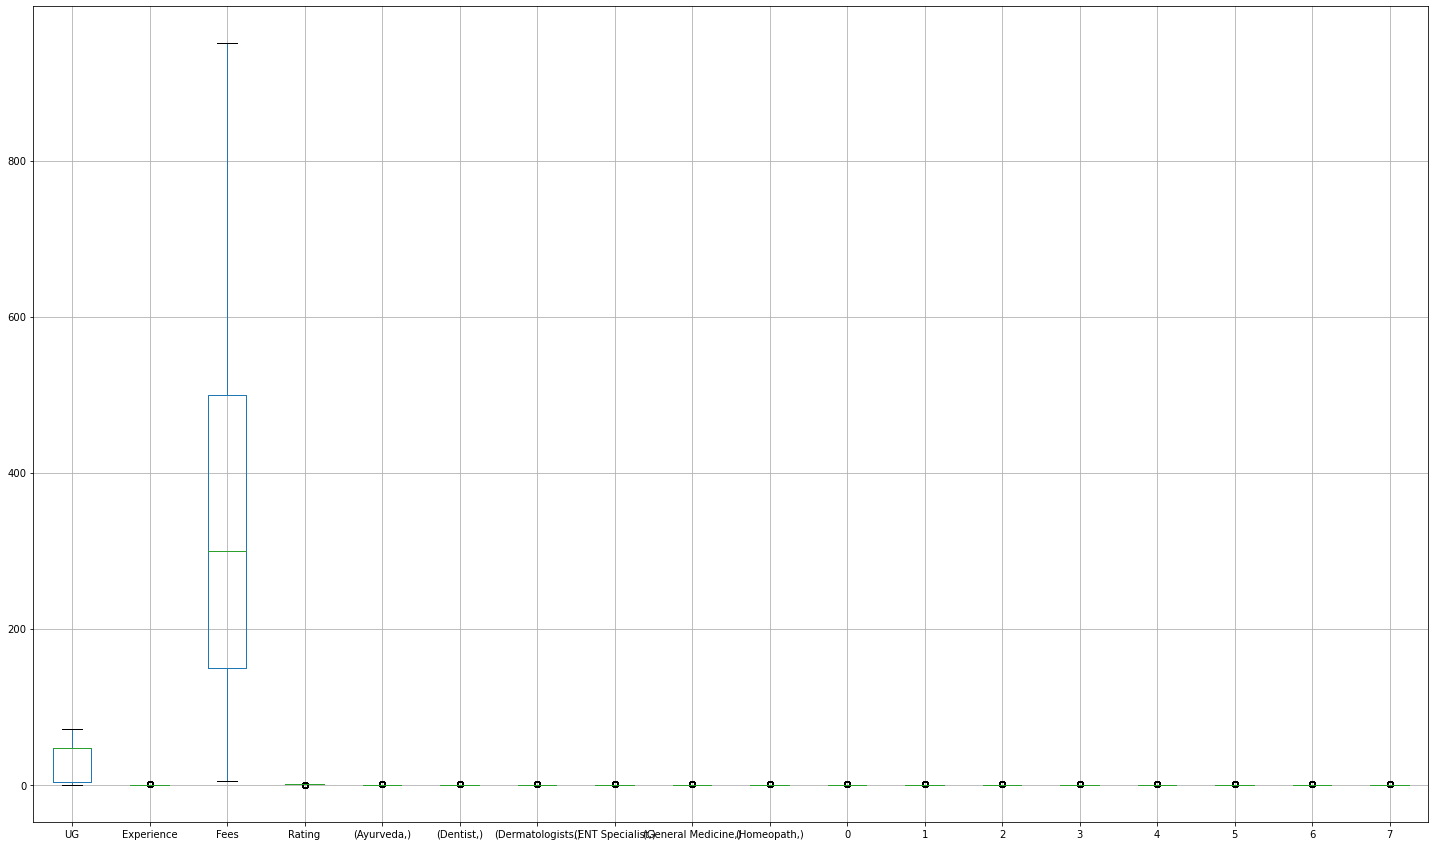

In [103]:
#plot boxplot
Doc.boxplot(figsize = [25,15])

##### no outliers

In [104]:
Doc.dtypes

UG                       int32
Experience               int32
Fees                     int64
Rating                   int32
(Ayurveda,)            float64
(Dentist,)             float64
(Dermatologists,)      float64
(ENT Specialist,)      float64
(General Medicine,)    float64
(Homeopath,)           float64
0                      float64
1                      float64
2                      float64
3                      float64
4                      float64
5                      float64
6                      float64
7                      float64
dtype: object

# Splitting dependent and Independent variables

In [105]:
x = Doc.drop("Fees", axis=1)
y = Doc["Fees"]

In [106]:
#scaling standardize the model thus the prediction come out with accuracy
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x = scale.fit_transform(x)

#scaled 

# Finding the best Algorithm

### Train/Test Split

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 200)

In [108]:
# printing the shape of train test split data
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(1756, 17)
(1756,)
(4096, 17)
(4096,)


In [109]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [110]:
model =[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [111]:
for m in model:
    m.fit(x_train, y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of " ,m, " is: ")
    print(accuracy_score(y_test,predm))
    #print(confusion_matrix(y_test,predm))
    #print(classification_report(y_test,predm))
    #print("\n")

Accuracy score of  LogisticRegression()  is: 
0.22608200455580865
Accuracy score of  GaussianNB()  is: 
0.002277904328018223
Accuracy score of  SVC()  is: 
0.22323462414578588
Accuracy score of  DecisionTreeClassifier()  is: 
0.18735763097949887
Accuracy score of  RandomForestClassifier()  is: 
0.1776765375854214


In [112]:
lr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [113]:
cross_list = [lr,gnb,svc,dt,rf]

from sklearn.model_selection import cross_val_score
for m in cross_list:
    scr = cross_val_score(m, x, y, cv = 7)
    print("the cross validation score of  model :", scr.mean())

the cross validation score of  model : 0.21155160628844838
the cross validation score of  model : 0.0025632262474367734
the cross validation score of  model : 0.20181134654818864
the cross validation score of  model : 0.18113465481886534
the cross validation score of  model : 0.1732740943267259


## Observation:
- The model performance is poor. Yet, out of all the classification algorithms tried RandomForest classfier has the best score of 
- 17%


# Hyper Parameter tuning

##### Hyper parameter tuning for Randomforest classifier

In [114]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

parameters = {"n_estimators" : n_estimators, 
              "max_depth" : max_depth, 
              "min_samples_split" : min_samples_split, 
              "min_samples_leaf" : min_samples_leaf            
    
}

RCV = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=3)




In [115]:
RCV.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 8, 15, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1200]})

In [116]:
RCV.best_params_

{'n_estimators': 800,
 'min_samples_split': 100,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [117]:
RCV_pred = RCV.best_estimator_.predict(x_test)

In [118]:
accuracy_score(y_test, RCV_pred)

0.22494305239179954

# Saving the Model

In [119]:
import joblib
joblib.dump(RCV.best_estimator_, "Doctorfeefinal.pkl")
joblib.dump(RCV.best_estimator_, "Doctorfeefinal.obj")

['Doctorfeefinal.obj']

In [121]:
import gzip, pickle
with gzip.open("Doctorfeefinal.pklz", 'wb') as ofp:
    pickle.dump(RCV_pred, ofp)